SMDM Poject File - Yedupati Venkata Yamini

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

In [219]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.21.5
1.4.4
0.11.2


In [220]:
austo_df = pd.read_csv('austo_automobile_dataset.csv')

A. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables) 

In [221]:
austo_df.head(10)

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   
5   53  Female   Salaried        Married  Post Graduate                 3   
6   53  Female   Salaried        Married  Post Graduate                 3   
7   52    Male   Salaried        Married       Graduate                 4   
8   52    Male   Salaried        Married  Post Graduate                 4   
9   52    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   
5            No         No             Yes   79800         60500.0   
6           Yes         No             Yes   80900         50800.0   
7            No         No             Yes   79100         40400.0   
8            No         No              No   89400             0.0   
9            No         No              No   83700             0.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000  SUV  
4        139900  57000  SUV  
5        140300  57000  SUV  
6        131700  51000  SUV  
7        119500  68000  SUV  
8         89400  61000  SUV  
9         83700  57000  SUV

In [222]:
austo_df.tail(10)

Age Gender Profession Marital_status Education  No_of_Dependents  \
1571   22   Male   Business        Married  Graduate                 3   
1572   22   Male   Business         Single  Graduate                 2   
1573   22   Male   Business        Married  Graduate                 3   
1574   22   Male   Salaried        Married  Graduate                 3   
1575   22   Male   Salaried        Married  Graduate                 3   
1576   22   Male   Salaried         Single  Graduate                 2   
1577   22   Male   Business        Married  Graduate                 4   
1578   22   Male   Business         Single  Graduate                 2   
1579   22   Male   Business        Married  Graduate                 3   
1580   22   Male   Salaried        Married  Graduate                 4   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
1571            No         No              No   36000             0.0   
1572           Yes         No              No   36700             0.0   
1573           Yes         No              No   36000             0.0   
1574           Yes        Yes              No   34700             0.0   
1575           Yes         No              No   34000             0.0   
1576            No        Yes              No   33300             0.0   
1577            No         No              No   32000             NaN   
1578            No        Yes              No   32900             0.0   
1579           Yes        Yes              No   32200             NaN   
1580            No         No              No   31600             0.0   

      Total_salary  Price       Make  
1571         36000  33000  Hatchback  
1572         36700  24000  Hatchback  
1573         36000  23000  Hatchback  
1574         34700  20000      Sedan  
1575         34000  19000  Hatchback  
1576         33300  27000  Hatchback  
1577         32000  31000  Hatchback  
1578         32900  30000  Hatchback  
1579         32200  24000  Hatchback  
1580         31600  31000  Hatchback

In [223]:
austo_df.shape[0]

1581

In [224]:
austo_df.shape[1]

14

In [225]:
austo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


1. There are missing values in Gender, Partner_Salary
2. Treat missing values in Partner_salary and it is float64

B.  Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data. 

In [226]:
austo_df.describe(include = "all").T

count unique            top  freq          mean  \
Age               1581.0    NaN            NaN   NaN     31.922201   
Gender              1528      4           Male  1199           NaN   
Profession          1581      2       Salaried   896           NaN   
Marital_status      1581      2        Married  1443           NaN   
Education           1581      2  Post Graduate   985           NaN   
No_of_Dependents  1581.0    NaN            NaN   NaN      2.457938   
Personal_loan       1581      2            Yes   792           NaN   
House_loan          1581      2             No  1054           NaN   
Partner_working     1581      2            Yes   868           NaN   
Salary            1581.0    NaN            NaN   NaN  60392.220114   
Partner_salary    1475.0    NaN            NaN   NaN  20225.559322   
Total_salary      1581.0    NaN            NaN   NaN  79625.996205   
Price             1581.0    NaN            NaN   NaN   35597.72296   
Make                1581      3          Sedan   702           NaN   

                           std      min      25%      50%      75%       max  
Age                   8.425978     22.0     25.0     29.0     38.0      54.0  
Gender                     NaN      NaN      NaN      NaN      NaN       NaN  
Profession                 NaN      NaN      NaN      NaN      NaN       NaN  
Marital_status             NaN      NaN      NaN      NaN      NaN       NaN  
Education                  NaN      NaN      NaN      NaN      NaN       NaN  
No_of_Dependents      0.943483      0.0      2.0      2.0      3.0       4.0  
Personal_loan              NaN      NaN      NaN      NaN      NaN       NaN  
House_loan                 NaN      NaN      NaN      NaN      NaN       NaN  
Partner_working            NaN      NaN      NaN      NaN      NaN       NaN  
Salary            14674.825044  30000.0  51900.0  59500.0  71800.0   99300.0  
Partner_salary    19573.149277      0.0      0.0  25600.0  38300.0   80500.0  
Total_salary      25545.857768  30000.0  60500.0  78000.0  95900.0  171000.0  
Price             13633.636545  18000.0  25000.0  31000.0  47000.0   70000.0  
Make                       NaN      NaN      NaN      NaN      NaN       NaN

In our case, total salary is sum of salary and partner_salary. it makes sense to either replace missing values of partner_salary to 0 or replace partner_salary with the difference of total_salary and salary

In [227]:
austo_df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [228]:
austo_df['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [229]:
austo_df['Gender'] = austo_df['Gender'].replace('Femal','Female')
austo_df['Gender'] = austo_df['Gender'].replace('Femle','Female')

In [230]:
austo_df['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

In [231]:
#count of missing values for 'Gender column'
austo_df['Gender'].isnull().sum()

53

In [232]:
#around 3% of variables in Gender have missing values, So we have 2 options.
#1. Replace 'Gender' with mode value since the magnitude of missing values is less i.e., 3%
#2. Introduce a new categorical level called 'Unknown' to categorize the missing values.
austo_df['Gender'] = austo_df['Gender'].replace(np.NaN,'Unknown') # I replaced missing categorical variable with new categorical level 'Unknown'

In [233]:
austo_df['Gender'].value_counts()

Male       1199
Female      329
Unknown      53
Name: Gender, dtype: int64

In [234]:
#having a look at all other categorical variables to make sure all are consistent

In [235]:
austo_df['Profession'].value_counts()

Salaried    896
Business    685
Name: Profession, dtype: int64

In [236]:
austo_df['Marital_status'].value_counts()

Married    1443
Single      138
Name: Marital_status, dtype: int64

In [237]:
austo_df['Education'].value_counts()

Post Graduate    985
Graduate         596
Name: Education, dtype: int64

In [238]:
austo_df['Personal_loan'].value_counts()

Yes    792
No     789
Name: Personal_loan, dtype: int64

In [239]:
austo_df['House_loan'].value_counts()

No     1054
Yes     527
Name: House_loan, dtype: int64

In [240]:
austo_df['Partner_working'].value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

In [241]:
austo_df['Make'].value_counts()

Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64

In [242]:
#coming to numeric variables - doing boxplot and describe for each numeric variable to understand each numeric variable's data

In [243]:
austo_df['Age'].describe().T

count    1581.000000
mean       31.922201
std         8.425978
min        22.000000
25%        25.000000
50%        29.000000
75%        38.000000
max        54.000000
Name: Age, dtype: float64

In [244]:
austo_df['Age'].value_counts().sort_index()

22     94
23    103
24    104
25    118
26     96
27     97
28    119
29    110
30    117
31     21
32     30
33     33
34     24
35     41
36     35
37     31
38     38
39     41
40     25
41     27
42     34
43     34
44     40
45     34
46     22
47     15
48      5
49     15
50      9
51     14
52     28
53     19
54      8
Name: Age, dtype: int64

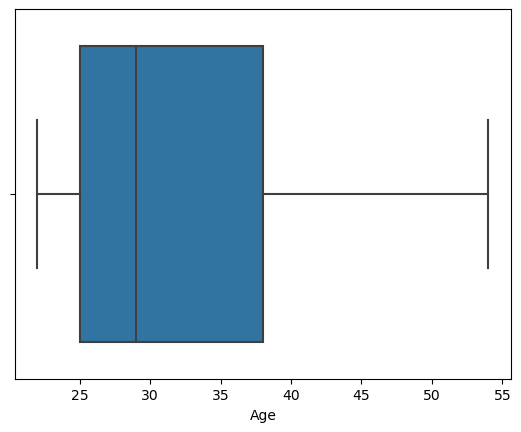

In [245]:
sns.boxplot(data= austo_df, x = "Age");

In [246]:
#Age looks all good - no anomalies, no bad data, no missing values, no outliers

In [247]:
austo_df['No_of_Dependents'].describe().T

count    1581.000000
mean        2.457938
std         0.943483
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: No_of_Dependents, dtype: float64

In [248]:
austo_df['No_of_Dependents'].value_counts().sort_index()

0     20
1    229
2    557
3    557
4    218
Name: No_of_Dependents, dtype: int64

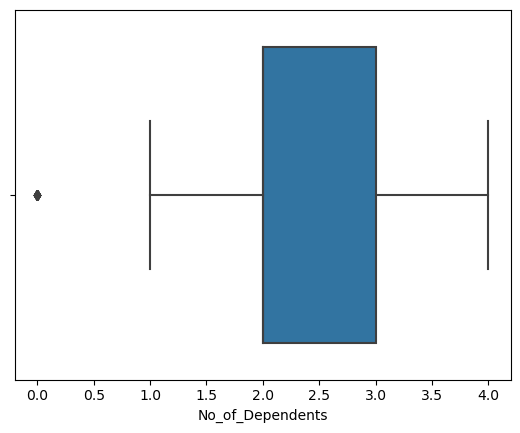

In [249]:
sns.boxplot(data = austo_df, x = 'No_of_Dependents');

In [250]:
# we observe that there is one outlier in number of dependents. we can treat it using 2 options
#1.Leave the outlier as is because having no of dependents 0 is meaningful and treating it as an outlier amy affect business insights.
#2.Replace the outlier value with the minimum value(lower whisker value) i.e., 1

In [251]:
#replace outliers in no_of_dependents with min value.
austo_df['No_of_Dependents'] = np.where(austo_df['No_of_Dependents'] == 0, 1, austo_df['No_of_Dependents'])

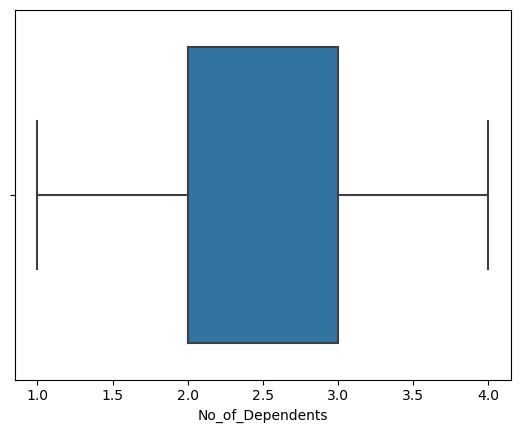

In [252]:
sns.boxplot(data = austo_df, x = 'No_of_Dependents');

In [253]:
austo_df['No_of_Dependents'].describe().T

count    1581.000000
mean        2.470588
std         0.916751
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: No_of_Dependents, dtype: float64

In [254]:
austo_df['Price'].describe().T

count     1581.000000
mean     35597.722960
std      13633.636545
min      18000.000000
25%      25000.000000
50%      31000.000000
75%      47000.000000
max      70000.000000
Name: Price, dtype: float64

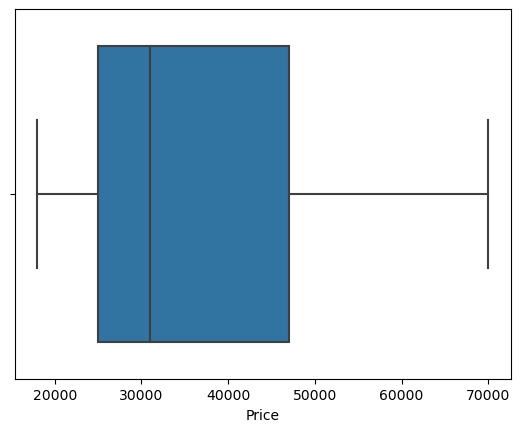

In [255]:
sns.boxplot(data = austo_df, x = 'Price');

In [256]:
#Price looks all good.

In [257]:
austo_df['Salary'].describe().T

count     1581.000000
mean     60392.220114
std      14674.825044
min      30000.000000
25%      51900.000000
50%      59500.000000
75%      71800.000000
max      99300.000000
Name: Salary, dtype: float64

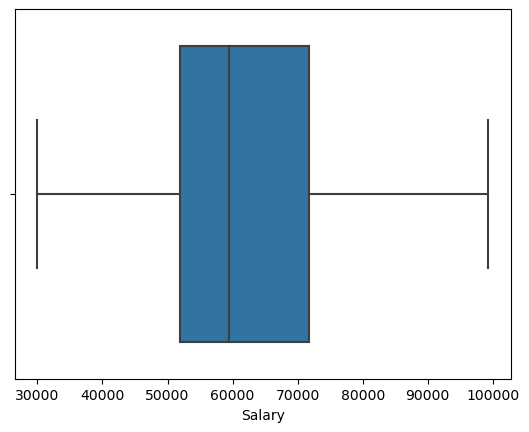

In [258]:
sns.boxplot(data = austo_df, x = 'Salary');

In [259]:
#Salary looks all good

In [265]:
austo_df['Partner_salary'].describe().T

count     1475.000000
mean     20225.559322
std      19573.149277
min          0.000000
25%          0.000000
50%      25600.000000
75%      38300.000000
max      80500.000000
Name: Partner_salary, dtype: float64

<AxesSubplot:xlabel='Partner_salary'>

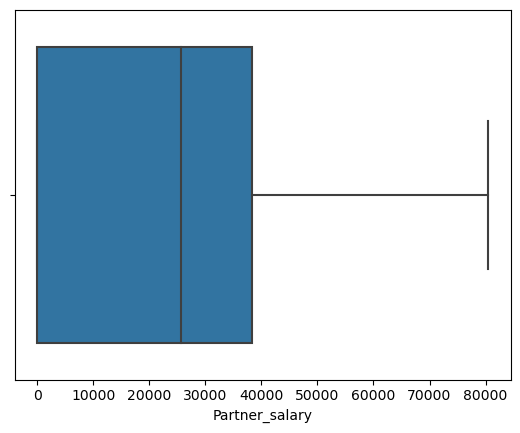

In [266]:
sns.boxplot(data=austo_df, x = "Partner_salary")

In [267]:
#determine if total salary is sum of salary and partner salary in all cases

In [268]:
austo_df[austo_df['Partner_salary'].isnull()]

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
40     53  Female   Salaried        Married       Graduate                 1   
43     52    Male   Salaried        Married  Post Graduate                 3   
49     52  Female   Business        Married  Post Graduate                 4   
59     54    Male   Salaried        Married       Graduate                 3   
111    48  Female   Business        Married       Graduate                 3   
...   ...     ...        ...            ...            ...               ...   
1559   22    Male   Business        Married  Post Graduate                 3   
1567   22    Male   Salaried         Single       Graduate                 1   
1568   22    Male   Salaried        Married       Graduate                 3   
1577   22    Male   Business        Married       Graduate                 4   
1579   22    Male   Business        Married       Graduate                 3   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
40             Yes         No              No   72100             NaN   
43              No         No             Yes   87600             NaN   
49              No         No             Yes   90300             NaN   
59             Yes         No             Yes   80600             NaN   
111             No         No             Yes   90300             NaN   
...            ...        ...             ...     ...             ...   
1559           Yes         No              No   52100             NaN   
1567           Yes        Yes              No   39700             NaN   
1568            No        Yes              No   38000             NaN   
1577            No         No              No   32000             NaN   
1579           Yes        Yes              No   32200             NaN   

      Total_salary  Price       Make  
40           72100  60000        SUV  
43           88200  51000        SUV  
49          170400  69000        SUV  
59           81000  51000        SUV  
111         161100  62000        SUV  
...            ...    ...        ...  
1559         52100  28000  Hatchback  
1567         39700  23000  Hatchback  
1568         38000  23000      Sedan  
1577         32000  31000  Hatchback  
1579         32200  24000  Hatchback  

[106 rows x 14 columns]

In [269]:
col_list = list(['Salary', 'Partner_salary'])

#create new column IndPlusPartnerSalary which has the list of sums of salary and partner salary
austo_df['IndPlusPartnerSalary'] = austo_df[col_list].sum(axis=1)

#change type of column IndPlusPartnerSalary to make it consistent with salary for comparison
austo_df['IndPlusPartnerSalary'] = austo_df['IndPlusPartnerSalary'].astype('int64')

#return the rows where Total salary is not equal to IndPlusPartnerSalary
austo_df.loc[austo_df['Total_salary'] != austo_df['IndPlusPartnerSalary']]


Age  Gender Profession Marital_status      Education  No_of_Dependents  \
43     52    Male   Salaried        Married  Post Graduate                 3   
49     52  Female   Business        Married  Post Graduate                 4   
59     54    Male   Salaried        Married       Graduate                 3   
111    48  Female   Business        Married       Graduate                 3   
209    43  Female   Salaried        Married       Graduate                 4   
284    41  Female   Business        Married  Post Graduate                 2   
339    39    Male   Salaried        Married  Post Graduate                 2   
376    38    Male   Salaried        Married  Post Graduate                 2   
424    37  Female   Salaried        Married       Graduate                 2   
444    36    Male   Business        Married  Post Graduate                 2   
554    33    Male   Salaried        Married       Graduate                 2   
654    30    Male   Business        Married  Post Graduate                 4   
779    29    Male   Salaried        Married       Graduate                 3   
1345   24    Male   Salaried        Married       Graduate                 3   
1349   24    Male   Business        Married       Graduate                 3   
1546   22    Male   Business        Married       Graduate                 3   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
43              No         No             Yes   87600             NaN   
49              No         No             Yes   90300             NaN   
59             Yes         No             Yes   80600             NaN   
111             No         No             Yes   90300             NaN   
209            Yes         No             Yes   53400             NaN   
284             No         No             Yes   70500             NaN   
339            Yes         No             Yes   76800             NaN   
376            Yes         No             Yes   79000             NaN   
424            Yes        Yes             Yes   62000             NaN   
444             No         No             Yes   72300             NaN   
554             No         No             Yes   41600             NaN   
654            Yes        Yes             Yes   64700             NaN   
779             No        Yes             Yes   59000             NaN   
1345           Yes         No             Yes   34600             NaN   
1349           Yes         No             Yes   32400             NaN   
1546           Yes         No             Yes   32600             NaN   

      Total_salary  Price       Make  IndPlusPartnerSalary  
43           88200  51000        SUV                 87600  
49          170400  69000        SUV                 90300  
59           81000  51000        SUV                 80600  
111         161100  62000        SUV                 90300  
209         123900  64000        SUV                 53400  
284         105800  33000      Sedan                 70500  
339         115400  50000      Sedan                 76800  
376         117400  46000      Sedan                 79000  
424         100700  46000      Sedan                 62000  
444         112400  48000      Sedan                 72300  
554          70100  48000      Sedan                 41600  
654          93200  30000  Hatchback                 64700  
779          87700  29000  Hatchback                 59000  
1345         58800  20000  Hatchback                 34600  
1349         58200  18000      Sedan                 32400  
1546         59300  20000  Hatchback                 32600

In [270]:
#replacing with difference also makes sense as partner_working for all the above columns is yes
austo_df['Partner_salary'] = np.where(austo_df['Partner_salary'].isnull(), austo_df['Total_salary'] - austo_df['Salary'], austo_df['Partner_salary'])

In [271]:
austo_df['Partner_salary'].isnull().sum()

0

In [272]:
col_list = list(['Salary', 'Partner_salary'])

#create new column IndPlusPartnerSalary which has the list of salary and partner salary
austo_df['IndPlusPartnerSalaryAfterTreatment'] = austo_df[col_list].sum(axis=1)

#change type of column IndPlusPartnerSalary to make it consistent with salary for comparison
austo_df['IndPlusPartnerSalaryAfterTreatment'] = austo_df['IndPlusPartnerSalaryAfterTreatment'].astype('int64')

#return the rows where Total salary is not equal to IndPlusPartnerSalary
austo_df.loc[austo_df['Total_salary'] != austo_df['IndPlusPartnerSalaryAfterTreatment']]

Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make, IndPlusPartnerSalary, IndPlusPartnerSalaryAfterTreatment]
Index: []

In [273]:
austo_df['Partner_salary'].describe()

count     1581.000000
mean     19233.776091
std      19670.391171
min          0.000000
25%          0.000000
50%      25100.000000
75%      38100.000000
max      80500.000000
Name: Partner_salary, dtype: float64

Till here we have treated Partner_salary columns and Gender columns

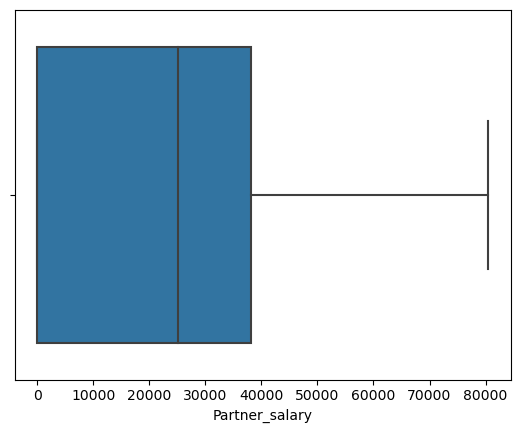

In [274]:
sns.boxplot(data = austo_df, x = 'Partner_salary'); 

In [325]:
austo_df['Total_salary'].describe().T

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary, dtype: float64

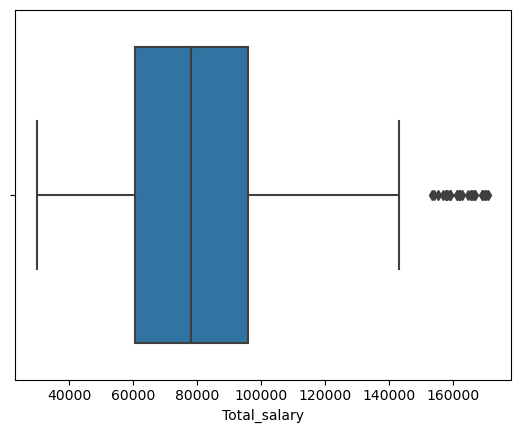

In [326]:
sns.boxplot(data = austo_df, x = 'Total_salary');

In [262]:
#max whisker value is Q3 + 1.5*IQR - which is 1,49,000

In [263]:
#viewing the rows that have total salary greater than 1,49,000 - 
austo_df[austo_df['Total_salary'] > 149000].shape

(27, 14)

In [330]:
#treating the outliers using max value i.e., higher value of box plot i.e., Q3 + 1.5*IQR
#creating another column with treated outlier values to help visualization of univariate analysis before and after outlier treatment
austo_df['Total_salary_Outlier_Treated'] = np.where(austo_df['Total_salary'] > 149000, 149000, austo_df['Total_salary'])

In [331]:
austo_df['Total_salary_Outlier_Treated'].describe().T

count      1581.000000
mean      79398.545225
std       24849.147996
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      149000.000000
Name: Total_salary_Outlier_Treated, dtype: float64

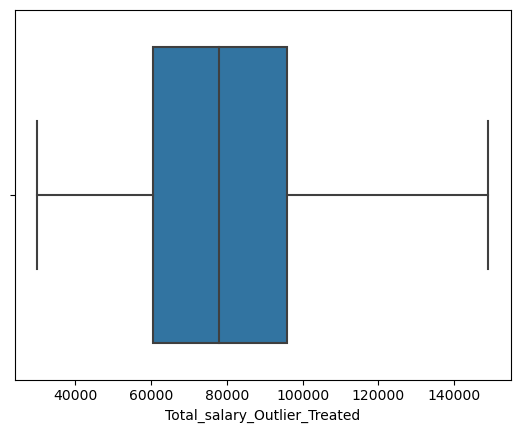

In [332]:
sns.boxplot(data = austo_df, x = 'Total_salary_Outlier_Treated');

In [333]:
#data preposcessing: check for duplicate rows and remove them
austo_df.duplicated().value_counts()

False    1581
dtype: int64

Result: no duplicated rows so no need of dropping duplicate rows

In [334]:
### Method I (Z Score)
#austo_df['No_of_Dependents_zscore'] = ( austo_df['No_of_Dependents'] - austo_df['No_of_Dependents'].mean() ) / austo_df['No_of_Dependents'].std()
#austo_df['No_of_Dependents_zscore'].describe()

In [335]:
#austo_df['No_of_Dependents_zscore'].value_counts()

In [336]:
#austo_df[austo_df['No_of_Dependents_zscore'] > 2]

In [337]:
#austo_df[austo_df['No_of_Dependents_zscore'] < -2]

In [338]:
austo_df.drop("IndPlusPartnerSalary", axis = 1, inplace = True)
austo_df.drop("IndPlusPartnerSalaryAfterTreatment", axis = 1, inplace = True)

KeyError: "['IndPlusPartnerSalary'] not found in axis"

In [339]:
austo_df.describe(include = "all").T

count unique            top  freq  \
Age                           1581.0    NaN            NaN   NaN   
Gender                          1581      3           Male  1199   
Profession                      1581      2       Salaried   896   
Marital_status                  1581      2        Married  1443   
Education                       1581      2  Post Graduate   985   
No_of_Dependents              1581.0    NaN            NaN   NaN   
Personal_loan                   1581      2            Yes   792   
House_loan                      1581      2             No  1054   
Partner_working                 1581      2            Yes   868   
Salary                        1581.0    NaN            NaN   NaN   
Partner_salary                1581.0    NaN            NaN   NaN   
Total_salary                  1581.0    NaN            NaN   NaN   
Price                         1581.0    NaN            NaN   NaN   
Make                            1581      3          Sedan   702   
Total_salary_Outlier_Treated  1581.0    NaN            NaN   NaN   

                                      mean           std      min      25%  \
Age                              31.922201      8.425978     22.0     25.0   
Gender                                 NaN           NaN      NaN      NaN   
Profession                             NaN           NaN      NaN      NaN   
Marital_status                         NaN           NaN      NaN      NaN   
Education                              NaN           NaN      NaN      NaN   
No_of_Dependents                  2.470588      0.916751      1.0      2.0   
Personal_loan                          NaN           NaN      NaN      NaN   
House_loan                             NaN           NaN      NaN      NaN   
Partner_working                        NaN           NaN      NaN      NaN   
Salary                        60392.220114  14674.825044  30000.0  51900.0   
Partner_salary                19233.776091  19670.391171      0.0      0.0   
Total_salary                  79625.996205  25545.857768  30000.0  60500.0   
Price                          35597.72296  13633.636545  18000.0  25000.0   
Make                                   NaN           NaN      NaN      NaN   
Total_salary_Outlier_Treated  79398.545225  24849.147996  30000.0  60500.0   

                                  50%      75%       max  
Age                              29.0     38.0      54.0  
Gender                            NaN      NaN       NaN  
Profession                        NaN      NaN       NaN  
Marital_status                    NaN      NaN       NaN  
Education                         NaN      NaN       NaN  
No_of_Dependents                  2.0      3.0       4.0  
Personal_loan                     NaN      NaN       NaN  
House_loan                        NaN      NaN       NaN  
Partner_working                   NaN      NaN       NaN  
Salary                        59500.0  71800.0   99300.0  
Partner_salary                25100.0  38100.0   80500.0  
Total_salary                  78000.0  95900.0  171000.0  
Price                         31000.0  47000.0   70000.0  
Make                              NaN      NaN       NaN  
Total_salary_Outlier_Treated  78000.0  95900.0  149000.0

In [340]:
#qnC - #Univariate analysis of numeric variables - histogram, boxplot | categorical variables - countplot draw for all variables and write analysis in report doc

In [341]:
austo_df['Gender'].value_counts(normalize = True)

Male       0.758381
Female     0.208096
Unknown    0.033523
Name: Gender, dtype: float64

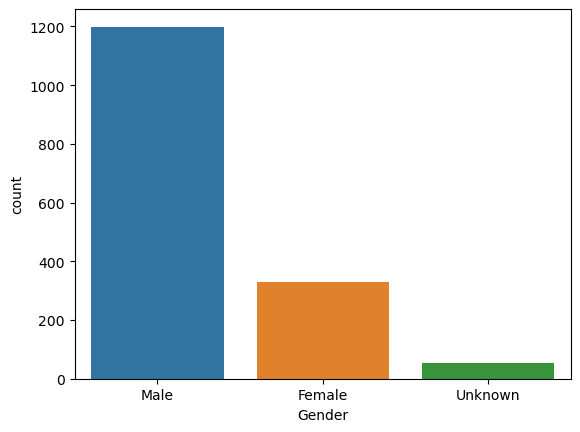

In [342]:
sns.countplot(data = austo_df, x = "Gender");
#Gender, Profession, Marital Status, Education, Personal Loan, House Loan, Partner working, Make 

In [343]:
austo_df['Profession'].value_counts(normalize = True)

Salaried    0.56673
Business    0.43327
Name: Profession, dtype: float64

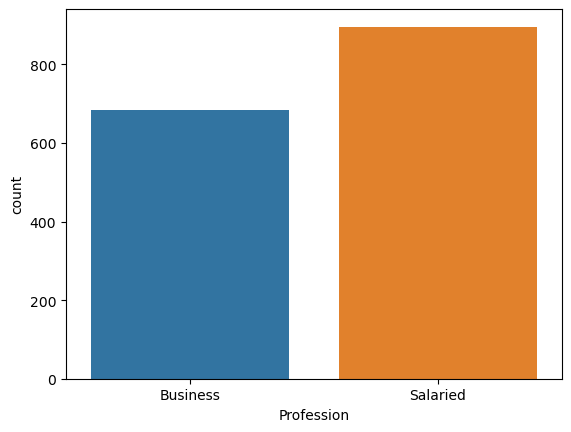

In [344]:
sns.countplot(data = austo_df, x = "Profession");

In [345]:
austo_df['Marital_status'].value_counts(normalize = True)

Married    0.912713
Single     0.087287
Name: Marital_status, dtype: float64

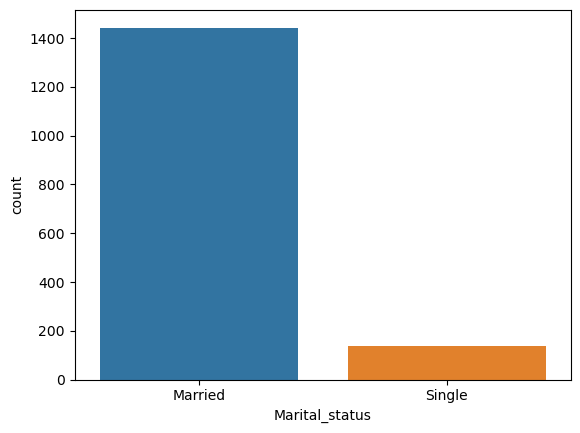

In [346]:
sns.countplot(data = austo_df, x = "Marital_status");

In [347]:
austo_df['Education'].value_counts(normalize = True)

Post Graduate    0.623023
Graduate         0.376977
Name: Education, dtype: float64

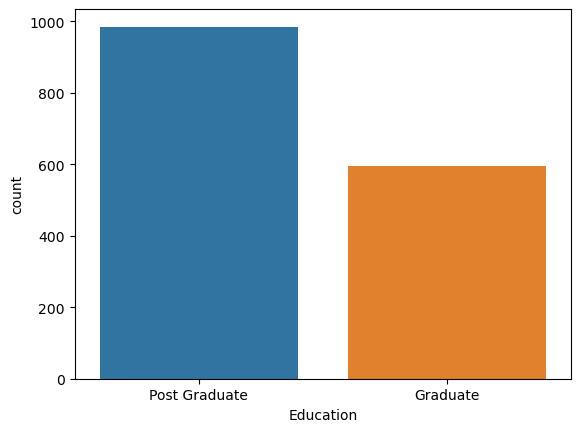

In [348]:
sns.countplot(data = austo_df, x = "Education");

In [349]:
austo_df['Personal_loan'].value_counts(normalize = True)

Yes    0.500949
No     0.499051
Name: Personal_loan, dtype: float64

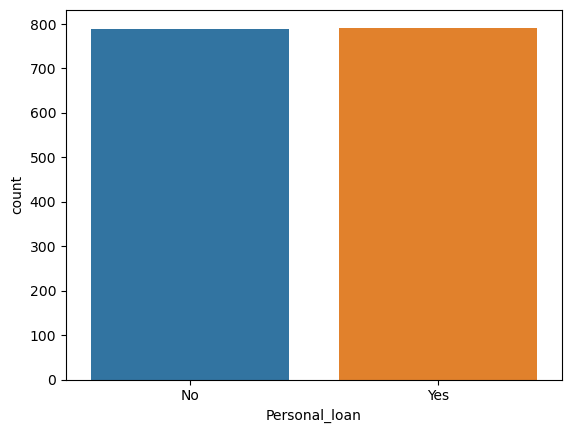

In [350]:
sns.countplot(data = austo_df, x = "Personal_loan");

In [351]:
austo_df['House_loan'].value_counts(normalize = True)

No     0.666667
Yes    0.333333
Name: House_loan, dtype: float64

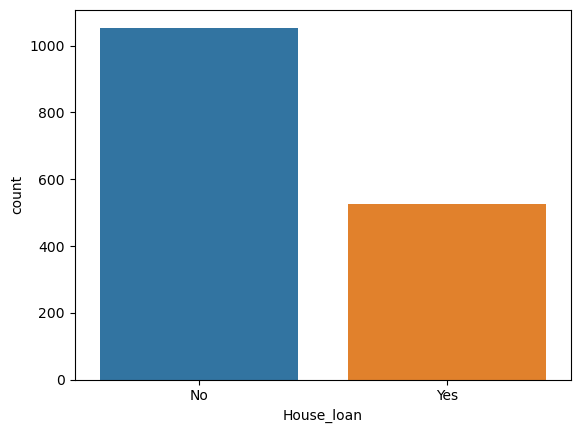

In [352]:
sns.countplot(data = austo_df, x = "House_loan");

In [353]:
austo_df['Partner_working'].value_counts(normalize = True)

Yes    0.54902
No     0.45098
Name: Partner_working, dtype: float64

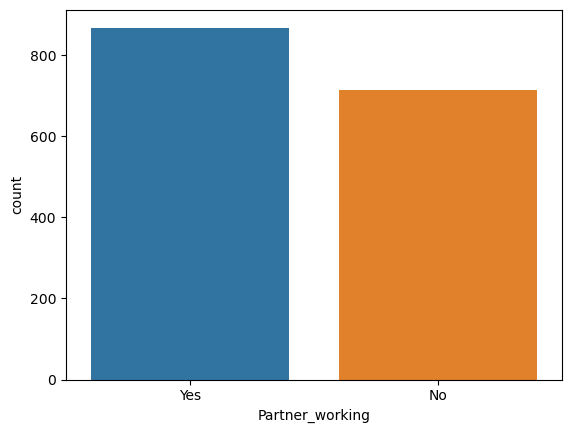

In [354]:
sns.countplot(data = austo_df, x = "Partner_working");

In [355]:
austo_df['Make'].value_counts(normalize = True)

Sedan        0.444023
Hatchback    0.368121
SUV          0.187856
Name: Make, dtype: float64

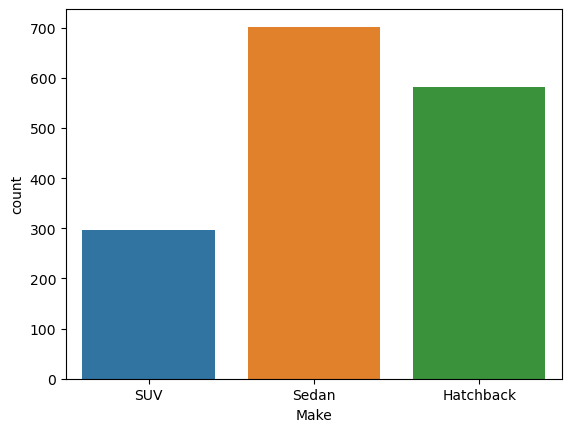

In [356]:
sns.countplot(data = austo_df, x = "Make");

In [357]:
#Univariate analysis of numeric variables

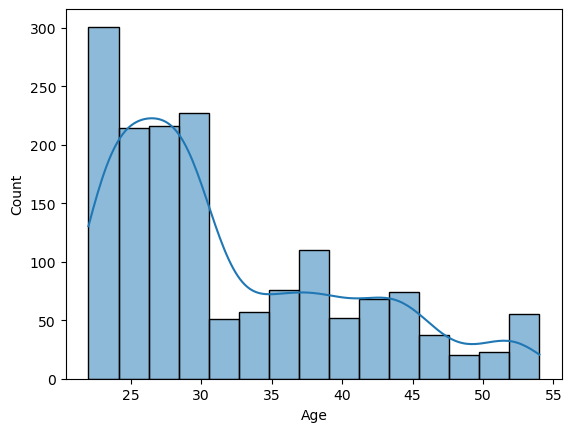

In [358]:
sns.histplot(data = austo_df, x = "Age", kde = True);

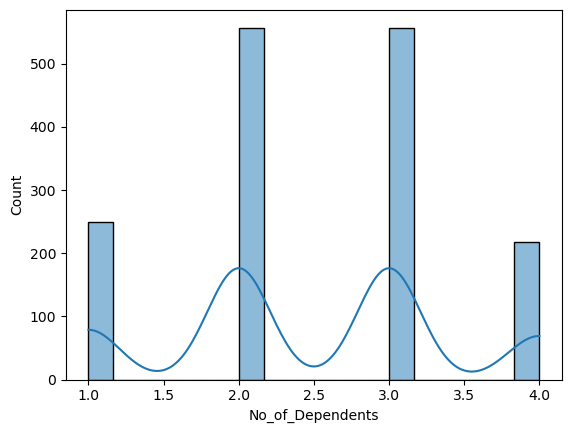

In [359]:
sns.histplot(data = austo_df, x = "No_of_Dependents", kde = True);

In [360]:
austo_df['No_of_Dependents'].value_counts(normalize = True)

3    0.352309
2    0.352309
1    0.157495
4    0.137887
Name: No_of_Dependents, dtype: float64

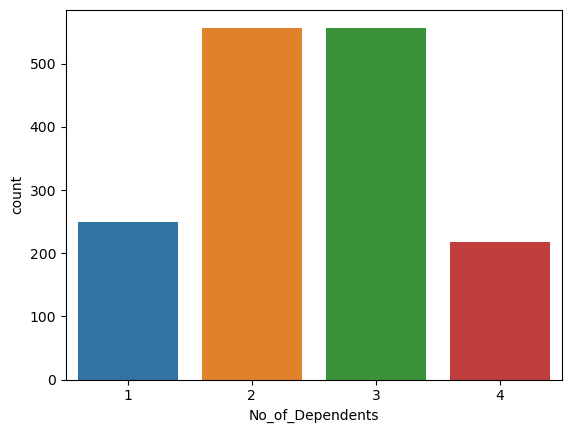

In [361]:
sns.countplot(data = austo_df, x = "No_of_Dependents"); 
# even though it is numeric, number of dependents is almost like categorical so countplot describes the data the best

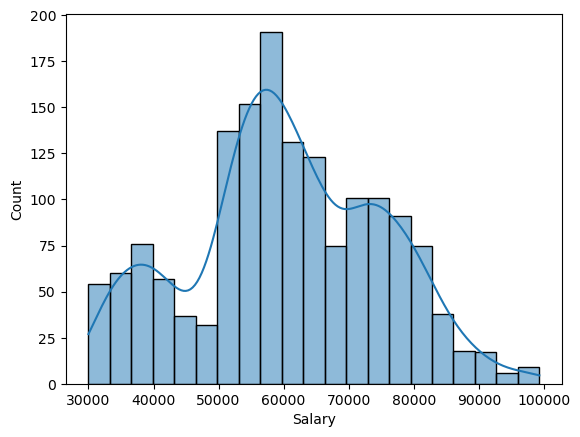

In [362]:
sns.histplot(data = austo_df, x = "Salary", kde = True);

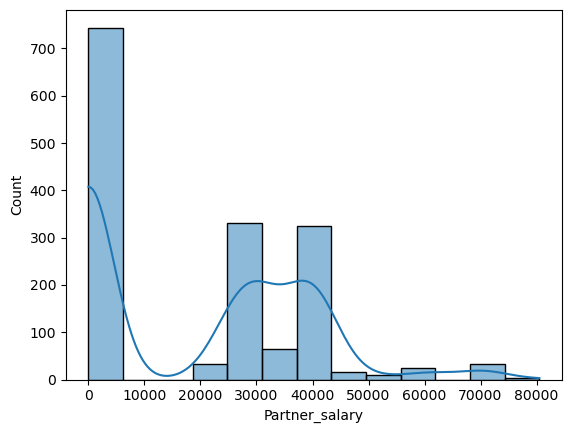

In [363]:
sns.histplot(data = austo_df, x = "Partner_salary", kde = True);

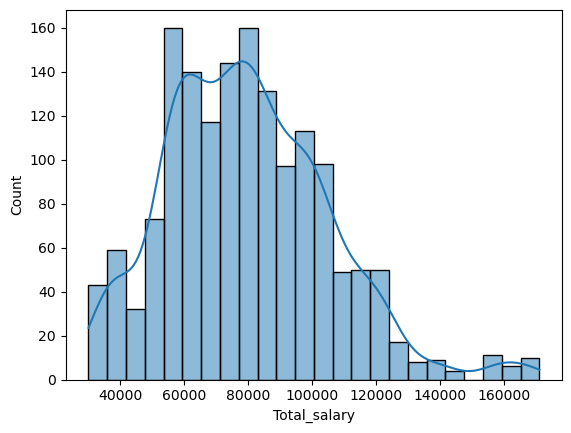

In [306]:
sns.histplot(data = austo_df, x = "Total_salary", kde = True);

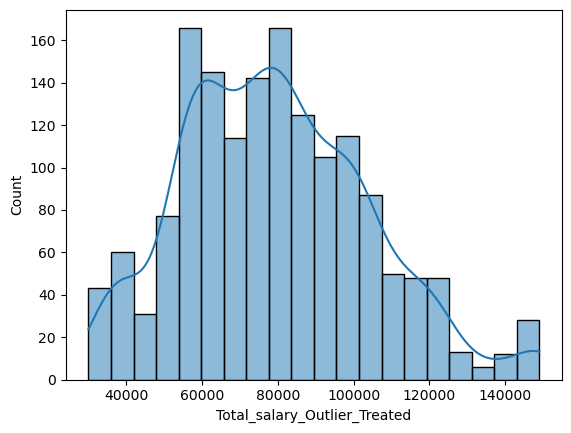

In [364]:
sns.histplot(data = austo_df, x = "Total_salary_Outlier_Treated", kde = True);

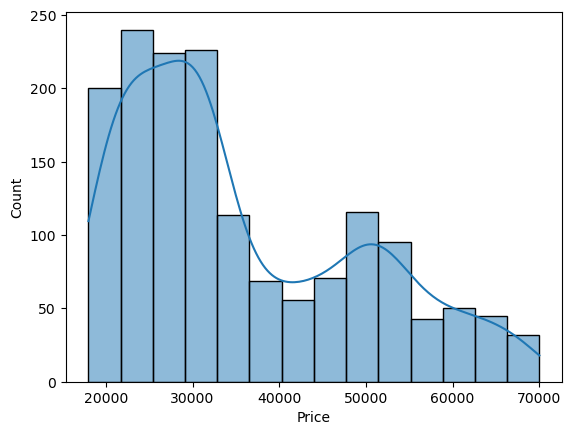

In [307]:
sns.histplot(data = austo_df, x = "Price", kde = True);

In [308]:
#qnD - bivariate and correlation analysis on variables and comment insights

In [309]:
#numeric vs numeric - pairplot/scatterplot, correlation/heatmap
#cat vs cat - countplot with hue
#cat vs numeric - box plot - x as cat, y as numeric

In [310]:
#cat vs cat analysis.
#Gender, Profession, Marital Status, Education, Personal Loan, House Loan, Partner working, Make 

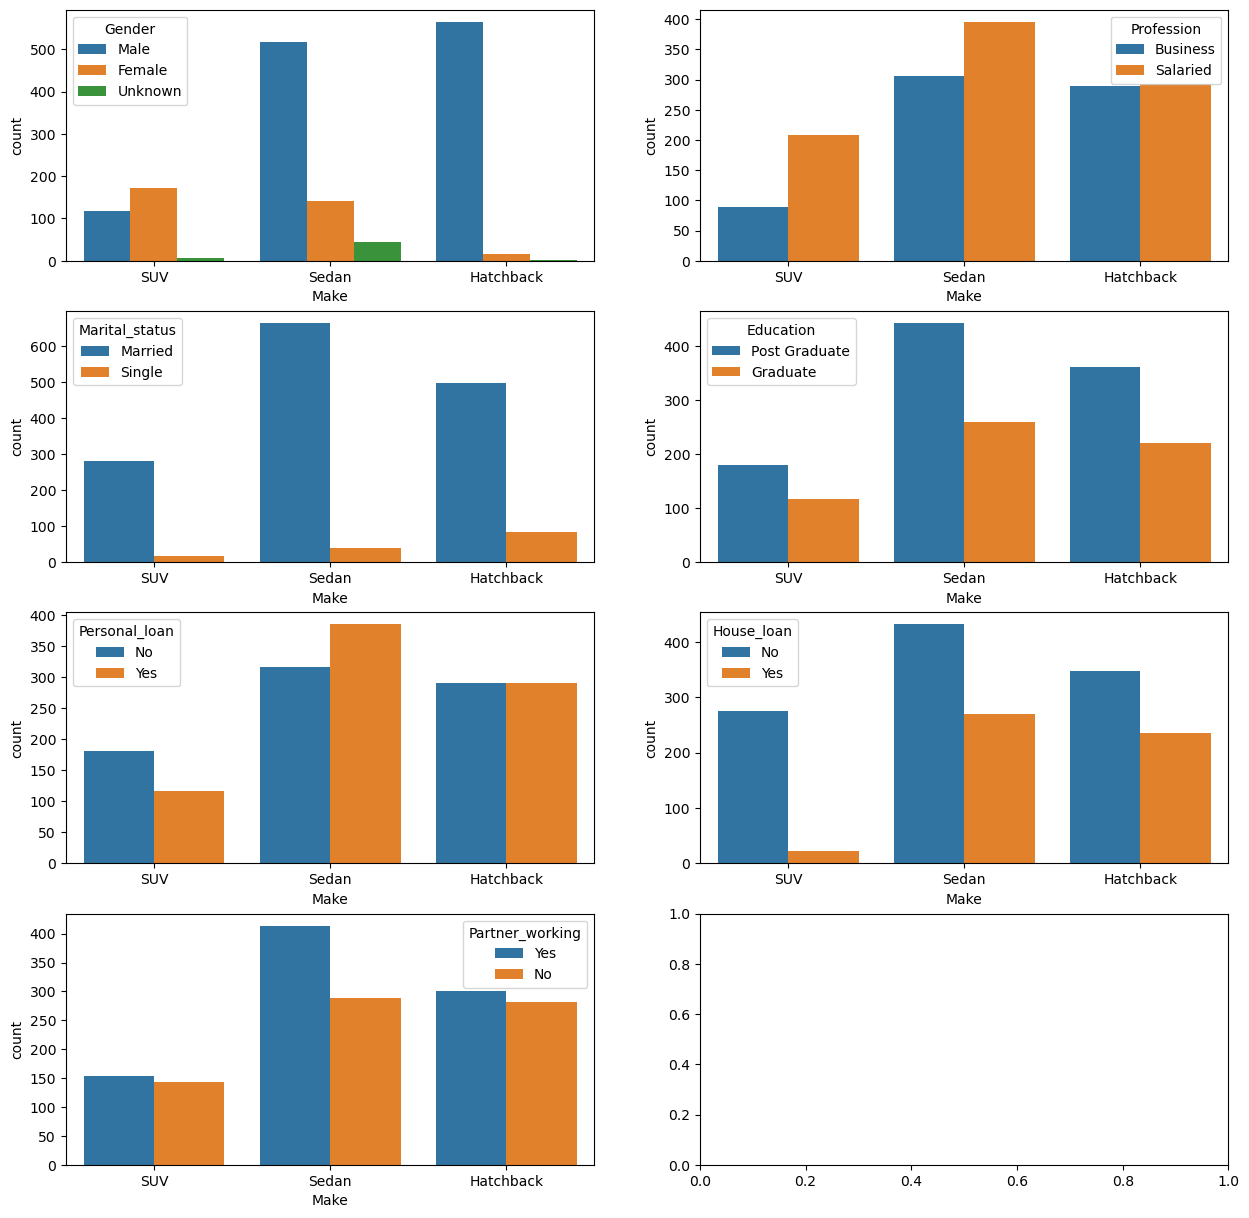

In [311]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.countplot(data = austo_df, x = 'Make', hue = 'Gender', ax = axes[0][0]);
sns.countplot(data = austo_df, x = 'Make', hue = 'Profession', ax = axes[0][1]);
sns.countplot(data = austo_df, x = 'Make', hue = 'Marital_status', ax = axes[1][0]);
sns.countplot(data = austo_df, x = 'Make', hue = 'Education', ax = axes[1][1]);
sns.countplot(data = austo_df, x = 'Make', hue = 'Personal_loan', ax = axes[2][0]);
sns.countplot(data = austo_df, x = 'Make', hue = 'House_loan', ax = axes[2][1]);
sns.countplot(data = austo_df, x = 'Make', hue = 'Partner_working', ax = axes[3][0]);
plt.show()

In [312]:
#cat vs numeric analysis
# Gender, Profession, Marital Status, Education, Personal Loan, House Loan, Partner working, Make 

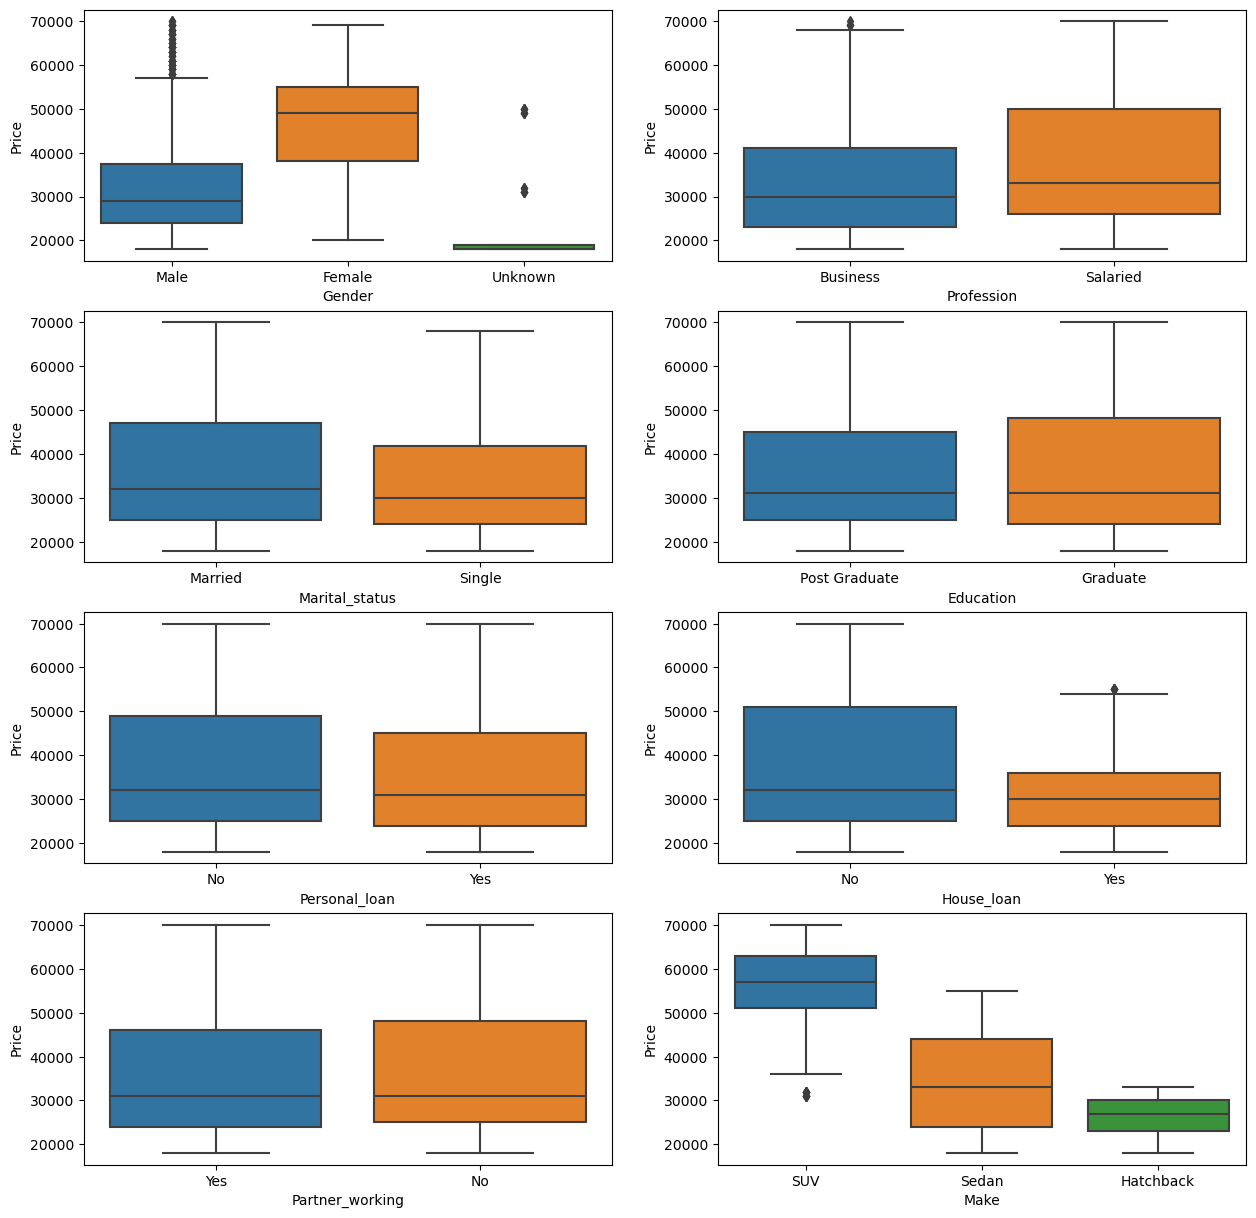

In [313]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(data = austo_df, x='Gender', y='Price', ax = axes[0][0]);
sns.boxplot(data = austo_df, x='Profession', y='Price', ax = axes[0][1]);
sns.boxplot(data = austo_df, x='Marital_status', y='Price', ax = axes[1][0]);
sns.boxplot(data = austo_df, x='Education', y='Price', ax = axes[1][1]);
sns.boxplot(data = austo_df, x='Personal_loan', y='Price', ax = axes[2][0]);
sns.boxplot(data = austo_df, x='House_loan', y='Price', ax = axes[2][1]);
sns.boxplot(data = austo_df, x='Partner_working', y='Price', ax = axes[3][0]);
sns.boxplot(data = austo_df, x='Make', y='Price', ax = axes[3][1]);
plt.show()

Age is highly overall correlated with Salary, Price, Gender, Make
Gender is highly overall correlated with Age
Price is highly overall correlated with Age, Make
Make is highly overall correlated with Age, Price

Salary, partner salary and total salary correlation, partnerworking
Education is highly overall correlated with Salary
Partner_working is highly overall correlated with Partner_salary, Total_salary


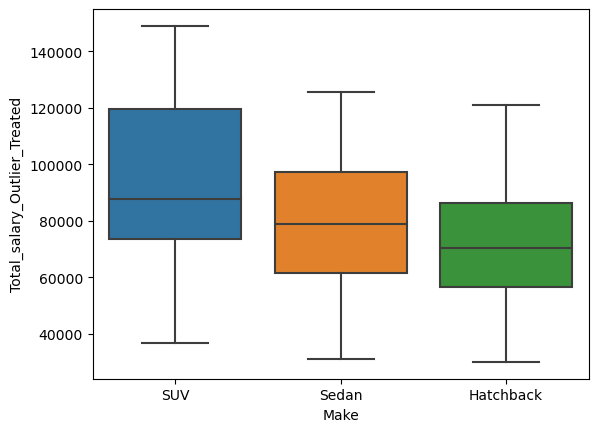

In [367]:
sns.boxplot(data = austo_df, x = 'Make', y = 'Total_salary_Outlier_Treated');

<AxesSubplot:xlabel='Total_salary_Outlier_Treated', ylabel='Price'>

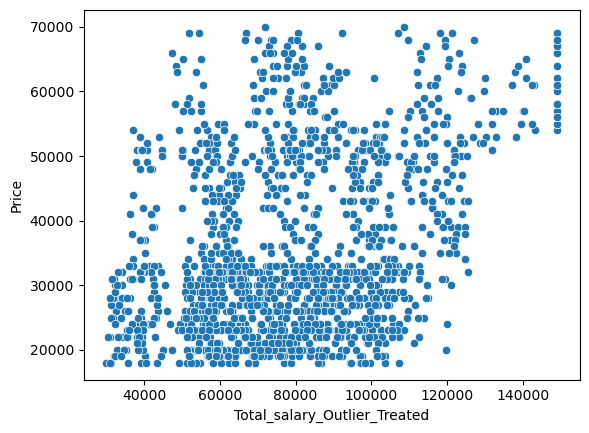

In [368]:
sns.scatterplot(data = austo_df, x = 'Total_salary_Outlier_Treated', y = 'Price')

In [314]:
#numerical to numerical analysis

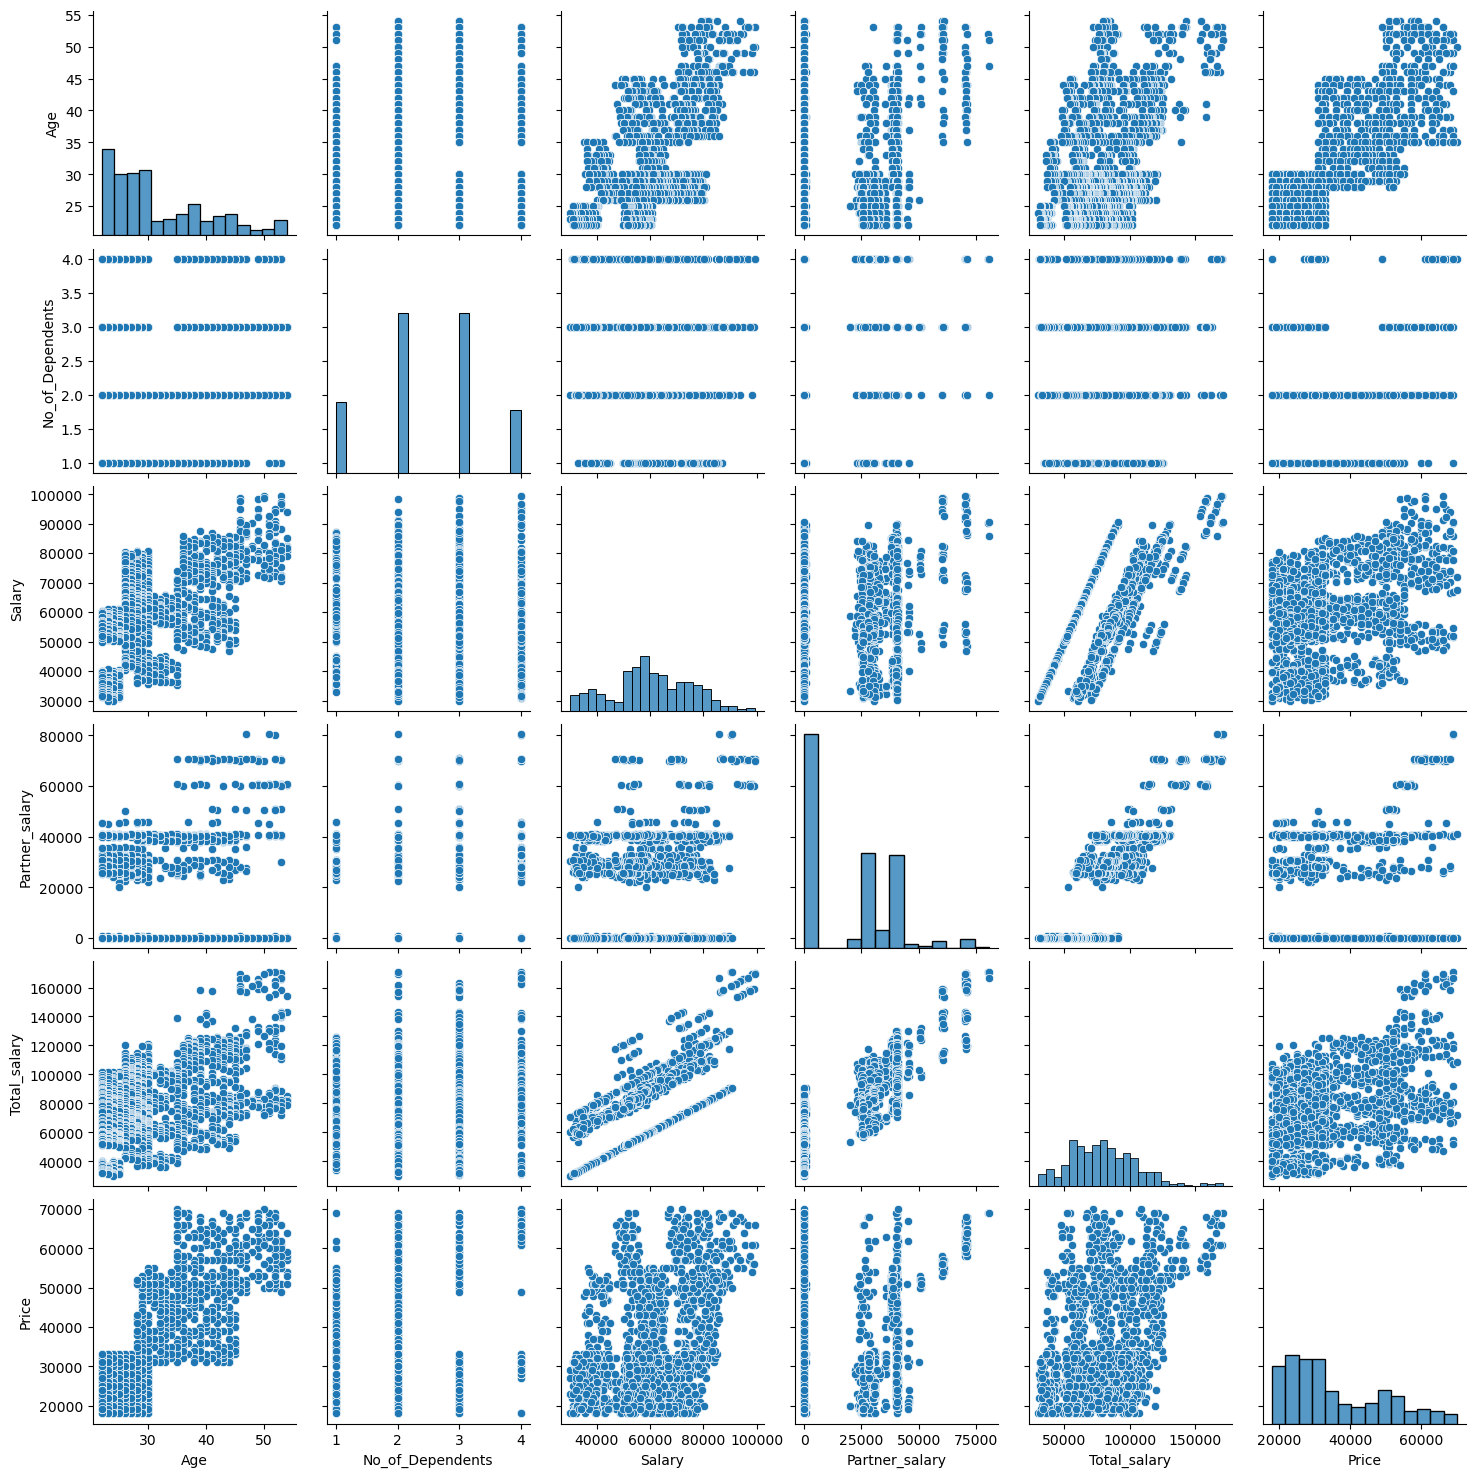

In [315]:
sns.pairplot(austo_df)

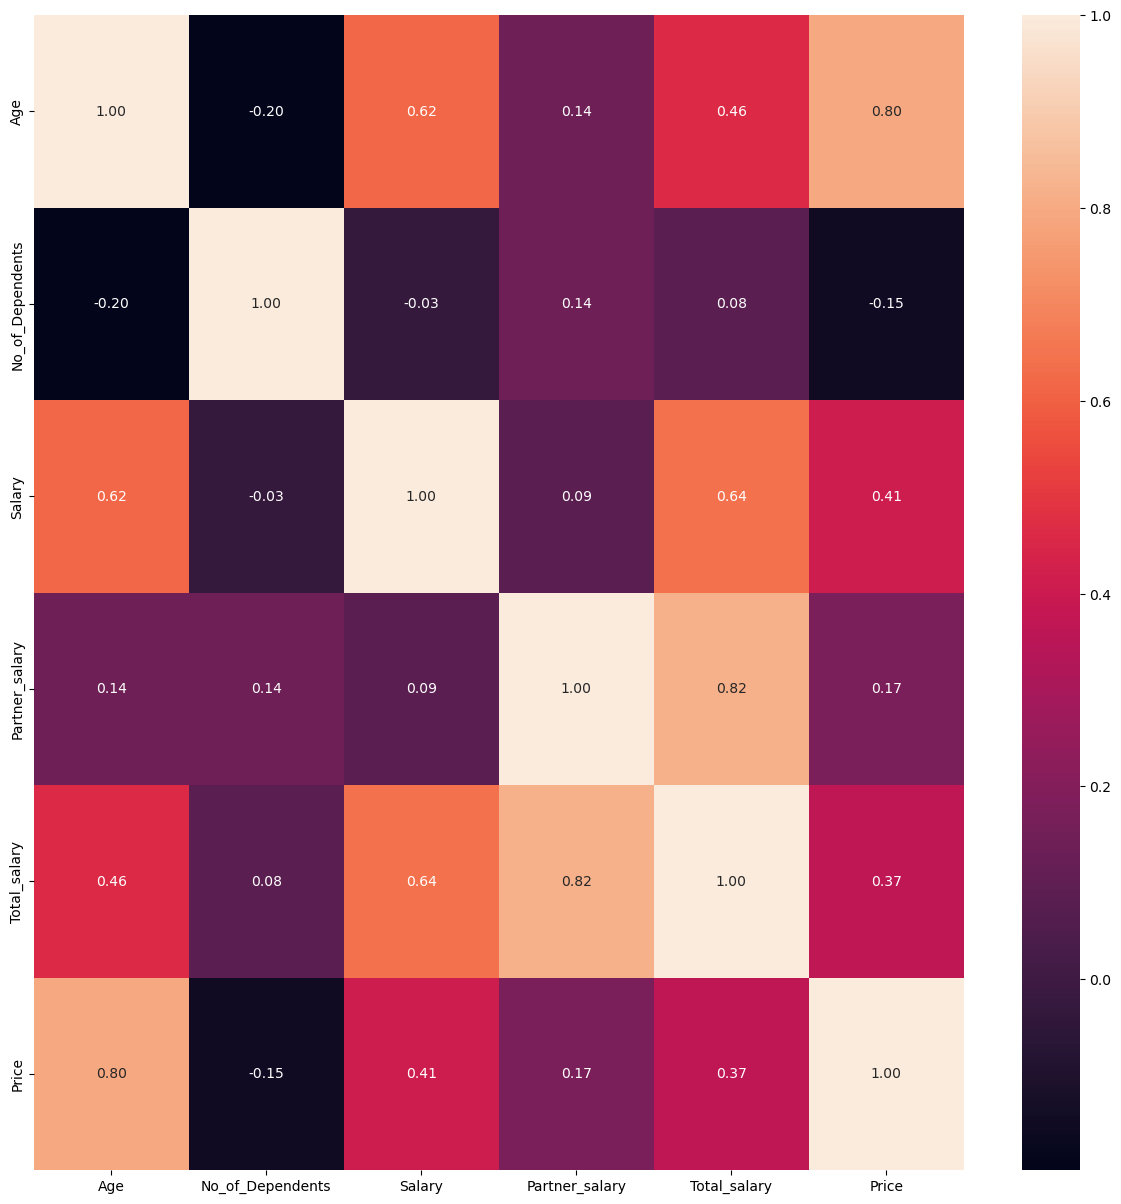

In [316]:
plt.figure(figsize=(15,15))
sns.heatmap(austo_df.corr(),annot=True,fmt=".2f");

In [317]:
#multivariate analysis

In [318]:
pd.crosstab(austo_df['Partner_working'], austo_df['Make'], margins=True, normalize = True)

Make             Hatchback       SUV     Sedan      All
Partner_working                                        
No                0.177736  0.091082  0.182163  0.45098
Yes               0.190386  0.096774  0.261860  0.54902
All               0.368121  0.187856  0.444023  1.00000

In [319]:
pd.crosstab(austo_df['No_of_Dependents'], austo_df['Make'], margins=True, normalize = True)

Make              Hatchback       SUV     Sedan       All
No_of_Dependents                                         
1                  0.016445  0.024668  0.116382  0.157495
2                  0.114485  0.055028  0.182796  0.352309
3                  0.161923  0.074004  0.116382  0.352309
4                  0.075269  0.034156  0.028463  0.137887
All                0.368121  0.187856  0.444023  1.000000

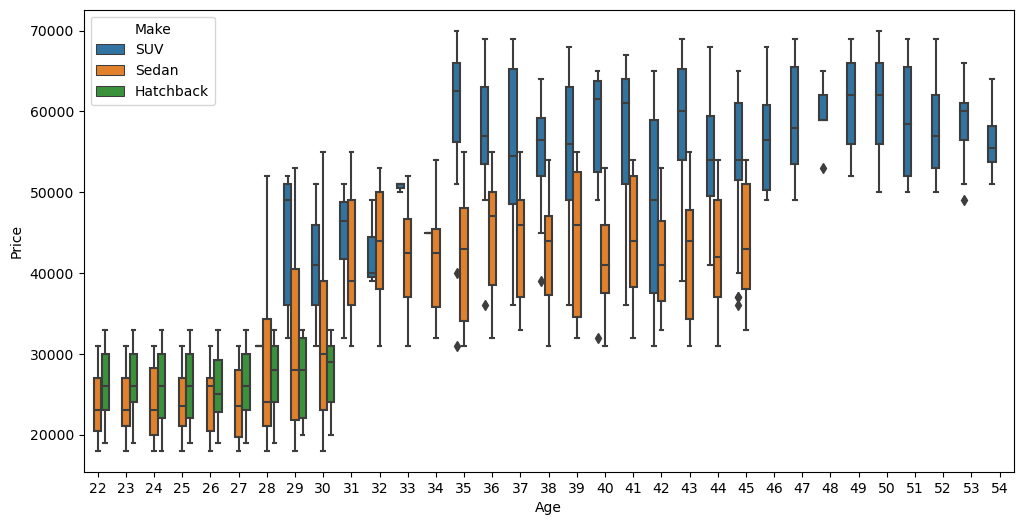

In [320]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Age', y='Price', hue='Make',data=austo_df);

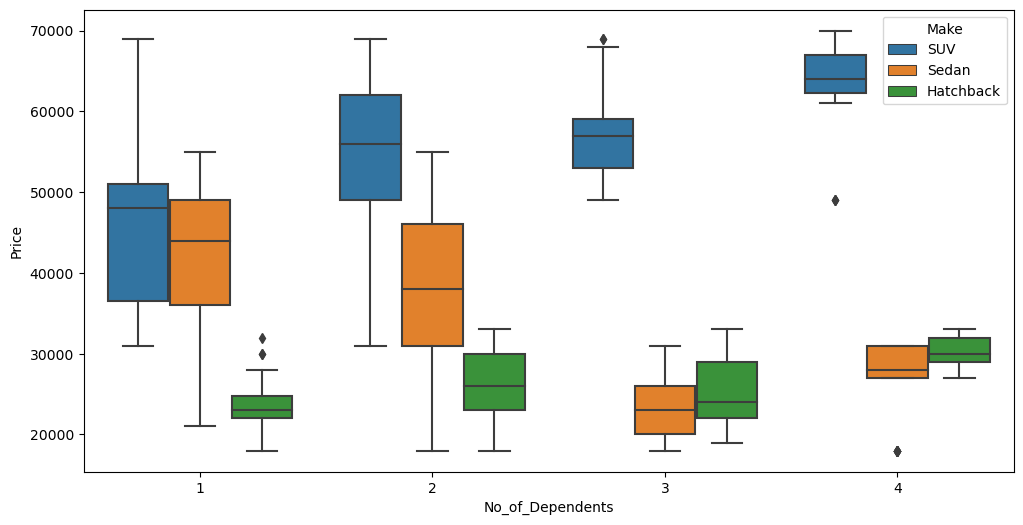

In [321]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='No_of_Dependents', y='Price', hue='Make',data=austo_df);

<AxesSubplot:xlabel='Age', ylabel='Price'>

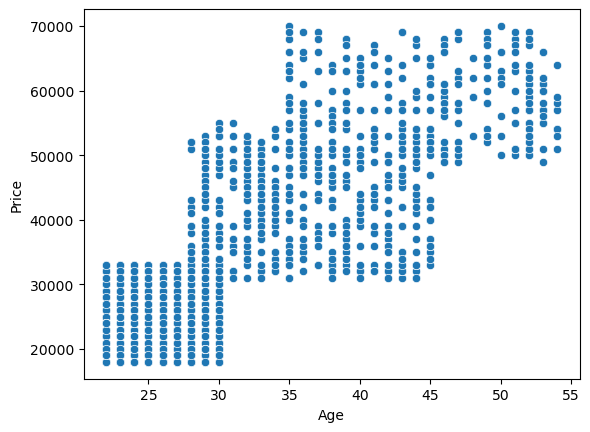

In [369]:
sns.scatterplot(data = austo_df, x = 'Age', y = 'Price')

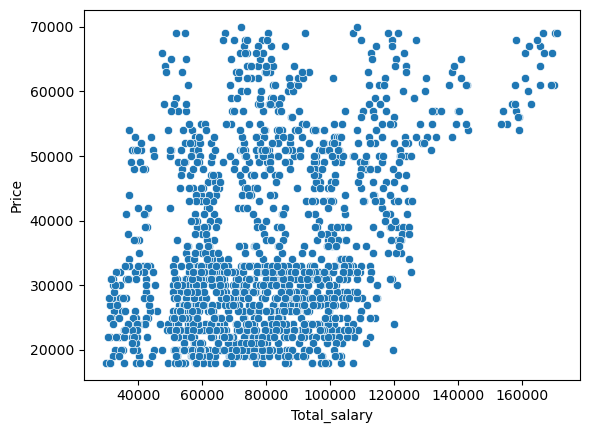

In [370]:
sns.scatterplot(data = austo_df, x = 'Total_salary', y = 'Price');

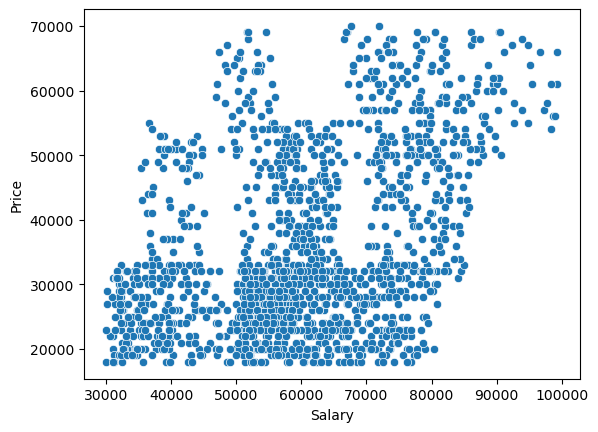

In [371]:
sns.scatterplot(data = austo_df, x = 'Salary', y = 'Price');

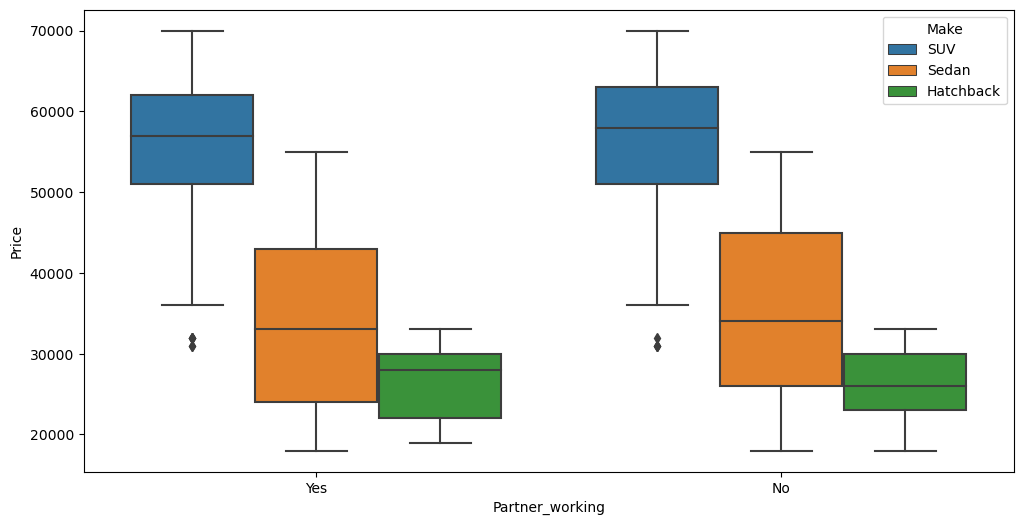

In [372]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Partner_working', y='Price', hue='Make',data=austo_df);

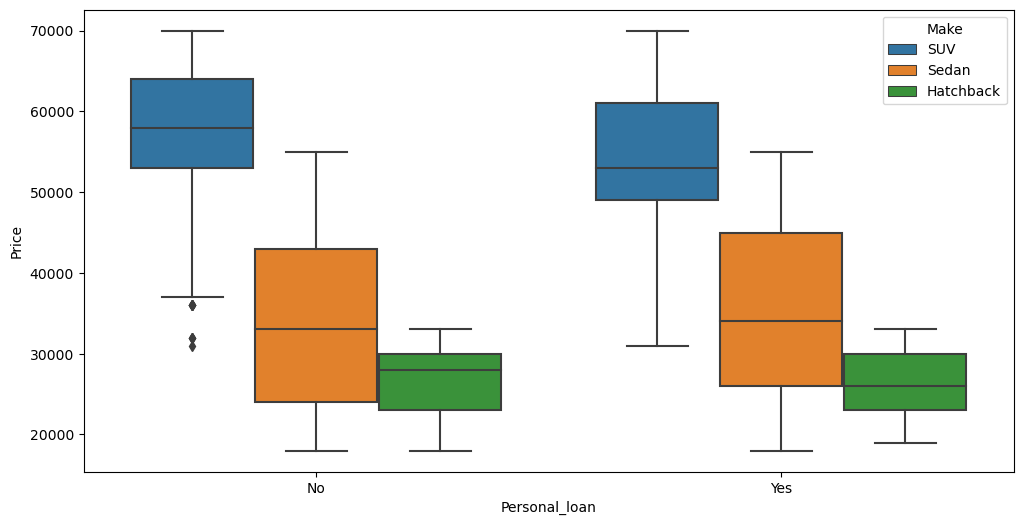

In [373]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Personal_loan', y='Price', hue='Make',data=austo_df);

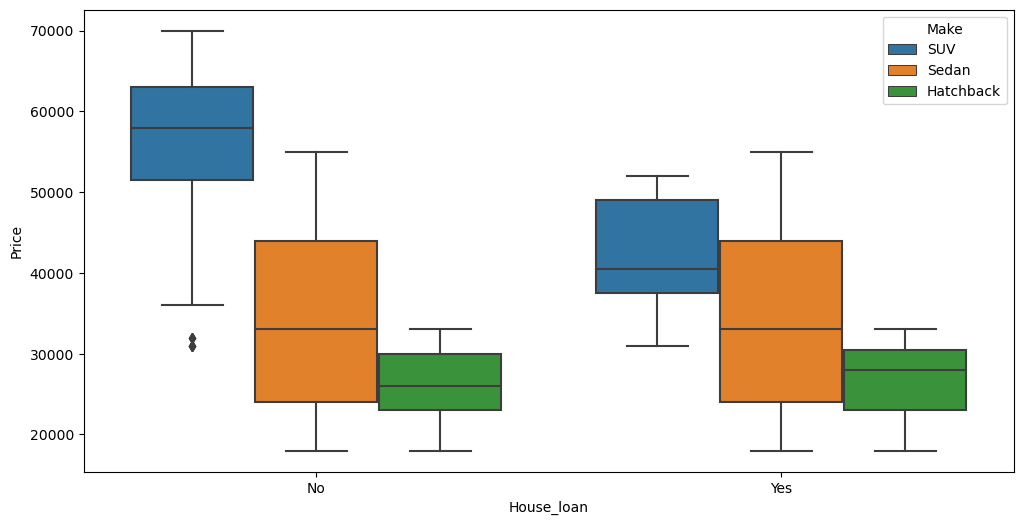

In [374]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='House_loan', y='Price', hue='Make',data=austo_df);

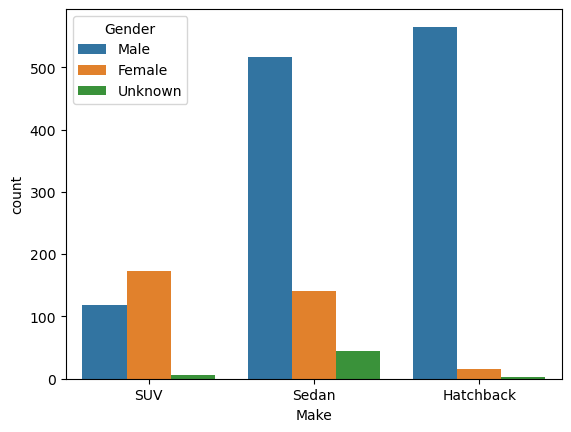

In [375]:
#qnE1 - Men prefer SUV by a large margin, compared to the women - false, women prefer to buy SUV more than men
#TODO: add title, legend, other cosmetics
sns.countplot(data = austo_df, x = austo_df['Make'], hue = 'Gender');

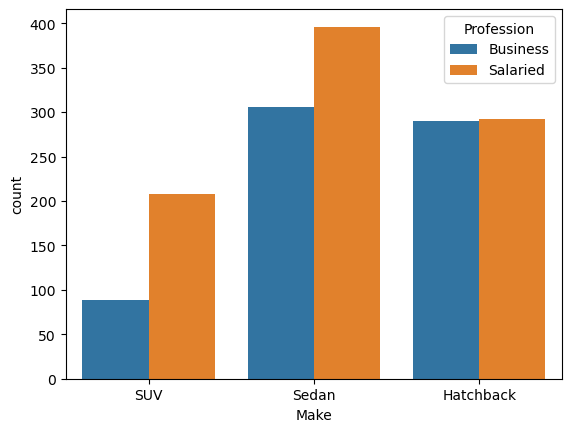

In [376]:
#qnE2 - Ned Stark believes that a salaried person is more likely to buy a Sedan
sns.countplot(data = austo_df, x = austo_df['Make'], hue = 'Profession');
#based on graph below - it is true that a salaried person is more likely to buy Sedan

In [377]:
#qnE3 - he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.
austo_df_salaried_male = austo_df[(austo_df['Profession'] == 'Salaried') & (austo_df['Gender'] == 'Male')]
austo_df_salaried_male['Profession'].value_counts()

Salaried    640
Name: Profession, dtype: int64

In [378]:
austo_df_salaried_male.groupby('Make').mean('Price')

Age  No_of_Dependents        Salary  Partner_salary  \
Make                                                                   
Hatchback  25.826087          2.865942  55282.246377    16017.028986   
SUV        45.600000          2.964706  74647.058824    22780.000000   
Sedan      31.587814          2.179211  59647.670251    20918.279570   

           Total_salary         Price  Total_salary_Outlier_Treated  
Make                                                                 
Hatchback  71299.275362  26626.811594                  71299.275362  
SUV        97427.058824  58905.882353                  96491.764706  
Sedan      80565.949821  34594.982079                  80565.949821

In [379]:
austo_df_salaried = austo_df[(austo_df['Profession'] == 'Salaried')]
pd.crosstab(austo_df_salaried['Gender'], austo_df['Make'], margins=True, normalize = True)

#below cross tab shows 10% Salaried male purchased SUV and 34% of salaried male purchased Sedan
#salaried male are easier target for Sedan sale as they are purchasing it more

Make     Hatchback       SUV     Sedan       All
Gender                                          
Female    0.016741  0.131696  0.101562  0.250000
Male      0.308036  0.094866  0.311384  0.714286
Unknown   0.001116  0.005580  0.029018  0.035714
All       0.325893  0.232143  0.441964  1.000000

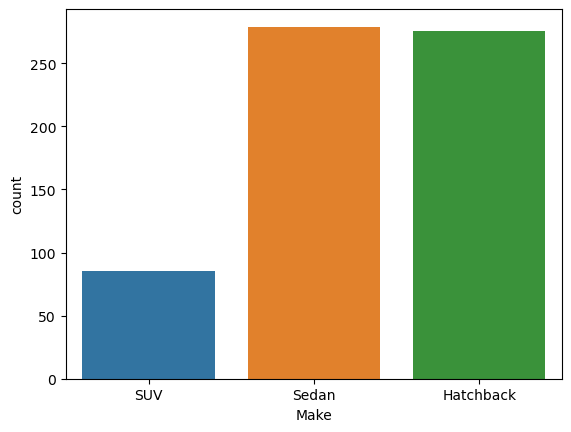

In [380]:
sns.countplot(data = austo_df_salaried_male, x = 'Make');
#don't consider this line - E3 looks conflicting because salaried males are the least who purchased SUV but to make them buy more and increase sale they can be targetted.

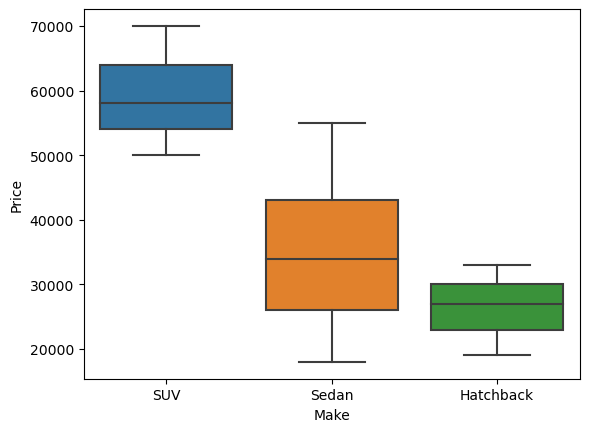

In [381]:
sns.boxplot(data = austo_df_salaried_male, y = 'Price', x = "Make");

In [382]:
#comment on the amount spent on purchasing automobiles across the following categories. 
#Comment on how a Business can utilize the results from this exercise.
#Give justification along with presenting metrics/charts used for arriving at the conclusions. 
#***F1) Gender

#variables to consider are Price(Numeric), Gender(Categorical)

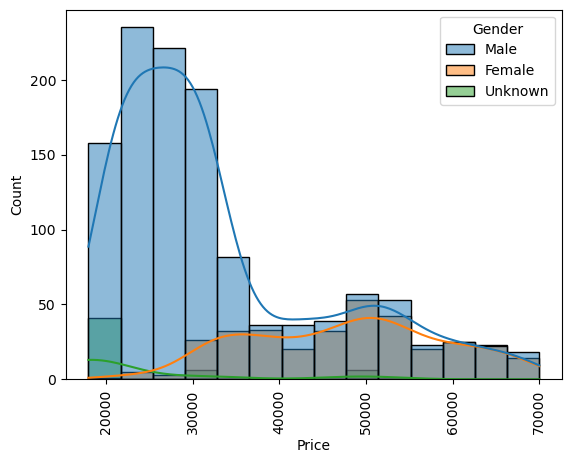

In [383]:
plt.plot(figsize = (35,7))
plt.xticks(rotation = 90)
sns.histplot(data = austo_df, x = 'Price', hue = 'Gender', kde = True);

In [384]:
#Male tend to purchase most cars within 60k range compared to females. Males have higher tendency of buying low budget cars
#Females have tendency of purchasing high budget cars.
#highest number of males have purchased cars worth around 25k
#highest number of females have purchased cars worth around 50k
#Females tend to spend higher than males. So females can be target for marketing campaigns involving costly cars.
#Males tend to have low spending than females. So males can be targeted for marketing campaigns involving budget cars.
#median is higher for females than males
#outliers are huge for males than females

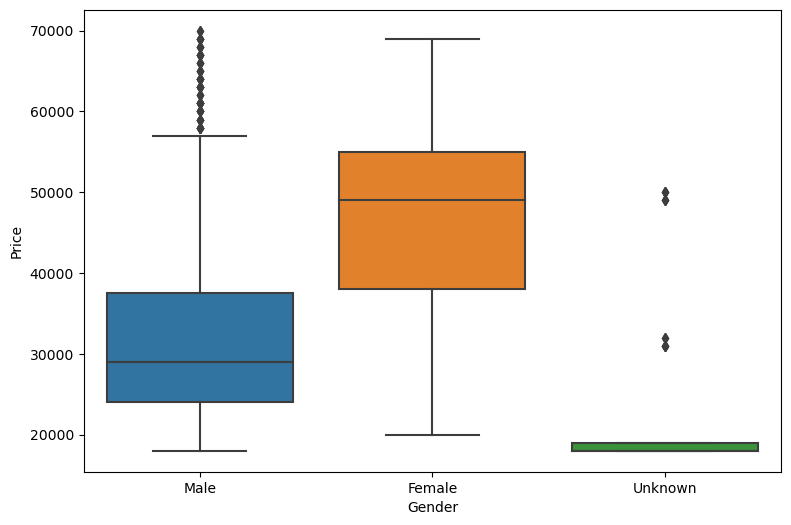

In [385]:
#Categorical vs numeric
fig_dims = (9, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(data = austo_df, x='Gender', y='Price');

In [386]:
#comment on the amount spent on purchasing automobiles across the following categories. 
#Comment on how a Business can utilize the results from this exercise.
#Give justification along with presenting metrics/charts used for arriving at the conclusions. 
#***F2) Personal Loan

#variables to consider are Price(Numeric), PersonalLoan(Categorical)

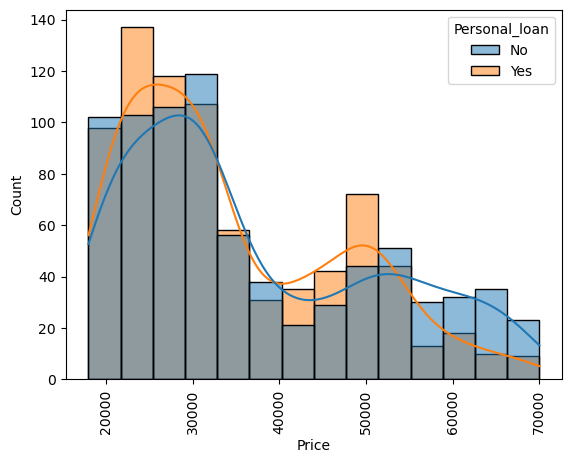

In [387]:
plt.plot(figsize = (35,7))
plt.xticks(rotation = 90)
sns.histplot(data = austo_df, x = 'Price', hue = 'Personal_loan', kde = True);

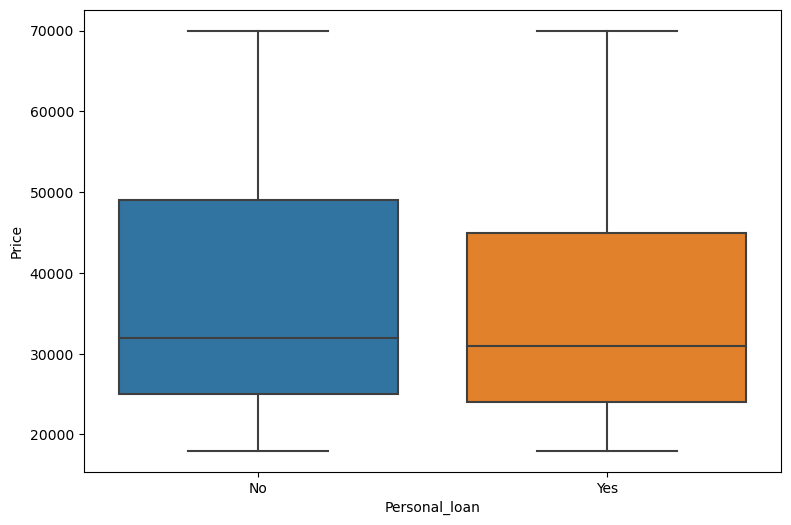

In [388]:
#Categorical vs numeric
fig_dims = (9, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(data = austo_df, x='Personal_loan', y='Price');

In [389]:
#G From the current data set comment if having a working partner leads to purchase of a higher priced car.
#variables - Price(numeric), Partner working(categorical)

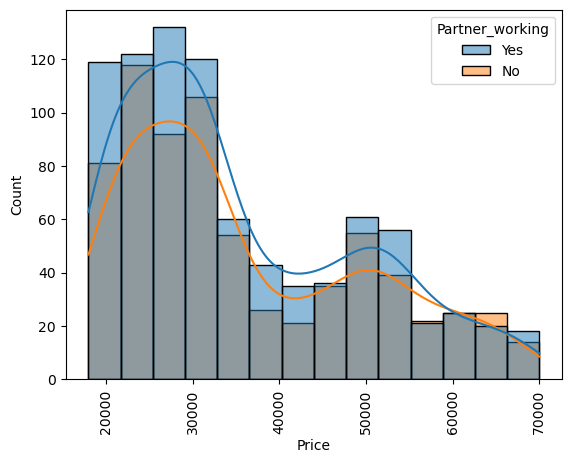

In [390]:
plt.plot(figsize = (35,7))
plt.xticks(rotation = 90)
sns.histplot(data = austo_df, x = 'Price', hue = 'Partner_working', kde = True);

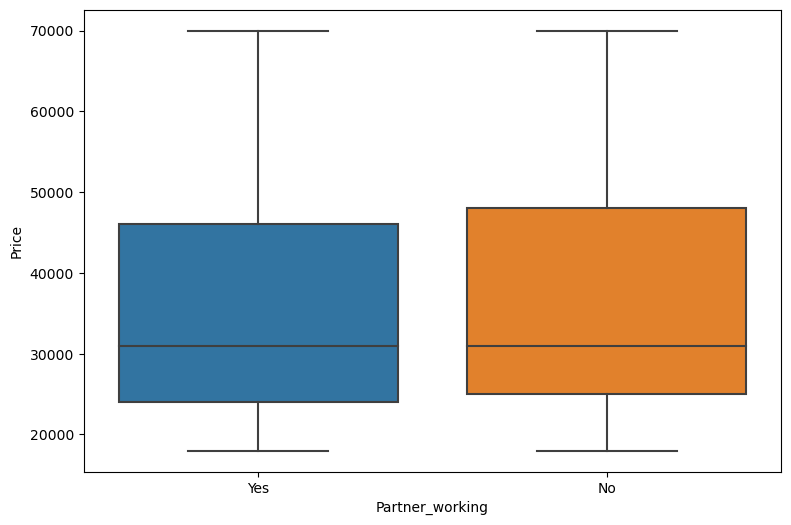

In [391]:
#Categorical vs numeric
fig_dims = (9, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(data = austo_df, x='Partner_working', y='Price');
#map correlations also if possible

In [392]:
#The main objective of this analysis is to devise an improved marketing strategy to send targeted information to 
#different groups of potential buyers present in the data. For the current analysis use Gender and Marital_status
#- fields to arrive at groups with similar purchase history.
#variables - Gender, Marital status on price(importantly) and make

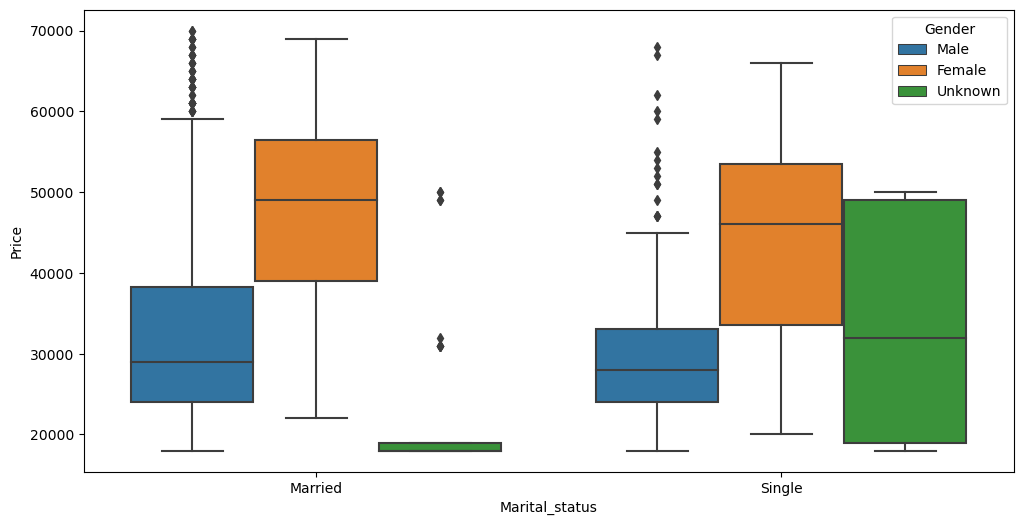

In [393]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(data = austo_df, x='Marital_status', y='Price', hue='Gender');

In [394]:
#Gender-MaritalStatus combinations
austo_df['GenderMaritalStatus'] = ""
austo_df['GenderMaritalStatus'] = np.where((austo_df['Gender'] == 'Male') & (austo_df['Marital_status'] == 'Married'), 'MaleMarried', austo_df['GenderMaritalStatus'])
austo_df['GenderMaritalStatus'] = np.where((austo_df['Gender'] == 'Male') & (austo_df['Marital_status'] == 'Single'), 'MaleSingle', austo_df['GenderMaritalStatus'])
austo_df['GenderMaritalStatus'] = np.where((austo_df['Gender'] == 'Female') & (austo_df['Marital_status'] == 'Married'), 'FemaleMarried', austo_df['GenderMaritalStatus'])
austo_df['GenderMaritalStatus'] = np.where((austo_df['Gender'] == 'Female') & (austo_df['Marital_status'] == 'Single'), 'FemaleSingle', austo_df['GenderMaritalStatus'])
austo_df['GenderMaritalStatus'].value_counts()

MaleMarried      1088
FemaleMarried     307
MaleSingle        111
                   53
FemaleSingle       22
Name: GenderMaritalStatus, dtype: int64

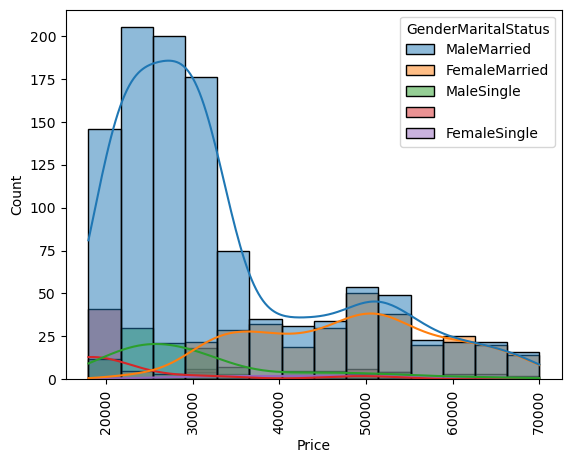

In [395]:
plt.plot(figsize = (35,7))
plt.xticks(rotation = 90)
sns.histplot(data = austo_df, x = 'Price', hue = 'GenderMaritalStatus', kde = True);

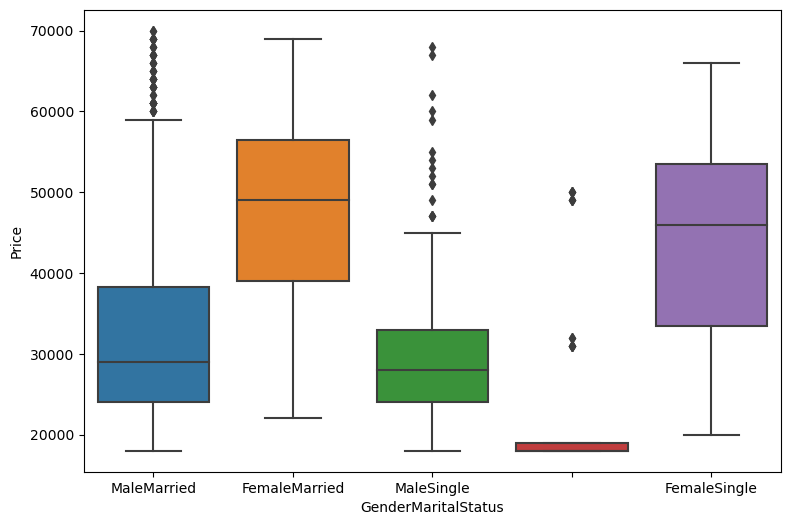

In [396]:
#Categorical vs numeric
fig_dims = (9, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(data = austo_df, x='GenderMaritalStatus', y='Price');
#map correlations also if possible

<AxesSubplot:xlabel='GenderMaritalStatus', ylabel='count'>

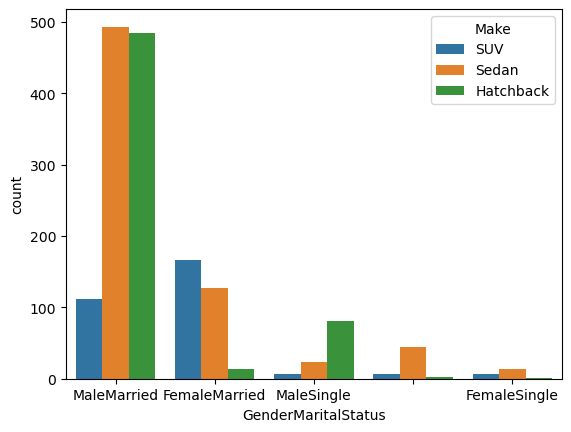

In [397]:
sns.countplot(data = austo_df, x='GenderMaritalStatus', hue='Make')

In [398]:
#***Framing An Analytics Problem*** Analyse the dataset and list down the top 5 important variables, 
#along with the business justifications.

In [444]:
df = pd.read_excel('godigt_cc_data.xlsx')

In [445]:
pd.options.display.max_columns = 30
df.head(10)

userid              card_no  card_bin_no      Issuer   card_type  \
0       1  4384 39XX XXXX XXXX       438439        Visa        edge   
1       2  4377 48XX XXXX XXXX       437748        Visa  prosperity   
2       3  4377 48XX XXXX XXXX       437748        Visa     rewards   
3       4  4258 06XX XXXX XXXX       425806        Visa   indianoil   
4       5  4377 48XX XXXX XXXX       437748        Visa        edge   
5       6  5241 78XX XXXX XXXX       524178  Mastercard    cashback   
6       7  4055 33XX XXXX XXXX       405533        Visa    cashback   
7       8  4375 51XX XXXX XXXX       437551        Visa        edge   
8       9  4377 48XX XXXX XXXX       437748        Visa    cashback   
9      10  4386 28XX XXXX XXXX       438628        Visa    shoprite   

  card_source_date high_networth  active_30  active_60  active_90  \
0       2019-09-29             B          0          1          1   
1       2002-10-30             A          1          1          1   
2       2013-10-05             C          0          0          0   
3       1999-06-01             E          0          1          1   
4       2006-06-13             B          1          1          1   
5       2015-01-28             E          0          0          1   
6       2013-11-08             E          1          1          1   
7       2014-12-27             B          0          1          1   
8       2015-07-15             D          0          0          1   
9       2000-09-20             D          0          0          0   

   cc_active30  cc_active60  cc_active90 hotlist_flag  widget_products  \
0            0            0            0            N                1   
1            0            0            0            N                4   
2            0            0            0            N                4   
3            1            1            1            N                6   
4            0            1            1            N                4   
5            0            1            1            N                3   
6            0            0            0            N                6   
7            1            1            1            N                5   
8            0            0            0            N                5   
9            1            1            1            N                7   

   engagement_products  annual_income_at_source other_bank_cc_holding  \
0                    3                  1552111                     Y   
1                    1                  4833871                     Y   
2                    2                  1345429                     N   
3                    0                   880560                     N   
4                    3                  1808582                     N   
5                    5                   847505                     N   
6                    5                   390508                     N   
7                    3                  1986565                     N   
8                    4                  1220369                     Y   
9                    6                  1229948                     Y   

   bank_vintage  T+1_month_activity  T+2_month_activity  T+3_month_activity  \
0            27                   0                   0                   0   
1            52                   0                   0                   0   
2            23                   1                   0                   0   
3            49                   0                   0                   1   
4            21                   1                   0                   0   
5            13                   0                   0                   0   
6             9                   0                   0                   0   
7            60                   0                   0                   0   
8            43                   0                   0                   0   
9            10                   0                 

In [446]:
#top 5 imp variables

# points to note

# 1. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation.
# 2. The bank makes money only if customers spend more on credit cards
# 3. the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. 
# 4. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. 
# (Higher intent means consumers would want to use the card and hence not be attrite.)


	Task1: Look at the type of data available for us to analyse. Analyse the datatypes and the attribute types of the variables(eg. Categorical, discrete, continuous..). Understand which types of variables are dominating in the dataset. This will help you to figure out which visualization techniques to use.
	Task2: Ask meaningful questions regarding the business objective and existing dataset as a starting point which will lead you to find answers using visualization techniques and understand business problem better.
	Task3: Find answers to all the above asked question and gain insights using visualization techniques.
	Task4: summarize the data along with their impact on the target variable with the help of insights gained from above visualizations.

In [447]:
df.describe().T

count          mean           std       min  \
userid                   8448.0  4.224500e+03  2.438872e+03       1.0   
card_bin_no              8448.0  4.367470e+05  3.048975e+04  376916.0   
active_30                8448.0  2.923769e-01  4.548815e-01       0.0   
active_60                8448.0  4.947917e-01  5.000025e-01       0.0   
active_90                8448.0  6.420455e-01  4.794271e-01       0.0   
cc_active30              8448.0  2.840909e-01  4.510070e-01       0.0   
cc_active60              8448.0  4.844934e-01  4.997891e-01       0.0   
cc_active90              8448.0  6.323390e-01  4.821970e-01       0.0   
widget_products          8448.0  3.614583e+00  2.273193e+00       0.0   
engagement_products      8448.0  3.991122e+00  2.572135e+00       0.0   
annual_income_at_source  8448.0  1.674595e+06  1.064307e+06  200095.0   
bank_vintage             8448.0  3.316418e+01  1.586834e+01       6.0   
T+1_month_activity       8448.0  1.112689e-01  3.144835e-01       0.0   
T+2_month_activity       8448.0  4.794034e-02  2.136527e-01       0.0   
T+3_month_activity       8448.0  8.037405e-02  2.718875e-01       0.0   
T+6_month_activity       8448.0  8.877841e-03  9.380867e-02       0.0   
T+12_month_activity      8448.0  9.469697e-03  9.685625e-02       0.0   
avg_spends_l3m           8448.0  4.952737e+04  4.624495e+04       0.0   
cc_limit                 8448.0  2.517069e+05  2.291149e+05       0.0   

                                25%        50%         75%        max  
userid                      2112.75     4224.5     6336.25     8448.0  
card_bin_no               426241.00   437551.0   438439.00   524178.0  
active_30                      0.00        0.0        1.00        1.0  
active_60                      0.00        0.0        1.00        1.0  
active_90                      0.00        1.0        1.00        1.0  
cc_active30                    0.00        0.0        1.00        1.0  
cc_active60                    0.00        0.0        1.00        1.0  
cc_active90                    0.00        1.0        1.00        1.0  
widget_products                2.00        4.0        6.00        7.0  
engagement_products            2.00        4.0        6.00        8.0  
annual_income_at_source  1061104.00  1372133.5  1881734.25  4999508.0  
bank_vintage                  19.00       33.0       47.00       60.0  
T+1_month_activity             0.00        0.0        0.00        1.0  
T+2_month_activity             0.00        0.0        0.00        1.0  
T+3_month_activity             0.00        0.0        0.00        1.0  
T+6_month_activity             0.00        0.0        0.00        1.0  
T+12_month_activity            0.00        0.0        0.00        1.0  
avg_spends_l3m             17110.00    37943.0    66095.75   289292.0  
cc_limit                   90000.00   150000.0   350000.00   990000.0

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [449]:
#treat missing values in Transactor Revolver
df['Transactor_revolver'] = df['Transactor_revolver'].replace(np.NaN,'Unknown')

In [450]:
df['Transactor_revolver'].value_counts()

T          7115
R          1295
Unknown      38
Name: Transactor_revolver, dtype: int64

In [451]:
df['Occupation_at_source'].value_counts()

Salaried         3918
Self Employed    2175
Retired          1089
Student           621
Housewife         384
0                 261
Name: Occupation_at_source, dtype: int64

In [452]:
#treat bad value in Occupation_at_source
df['Occupation_at_source'] = df['Occupation_at_source'].replace(0,'Unknown')

In [453]:
df['Occupation_at_source'].value_counts()

Salaried         3918
Self Employed    2175
Retired          1089
Student           621
Housewife         384
Unknown           261
Name: Occupation_at_source, dtype: int64

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [455]:
##numeric variables to check for outliers - annual_income_at_source, bank_vintage, avg_spends_l3m, cc_limit

<AxesSubplot:xlabel='annual_income_at_source'>

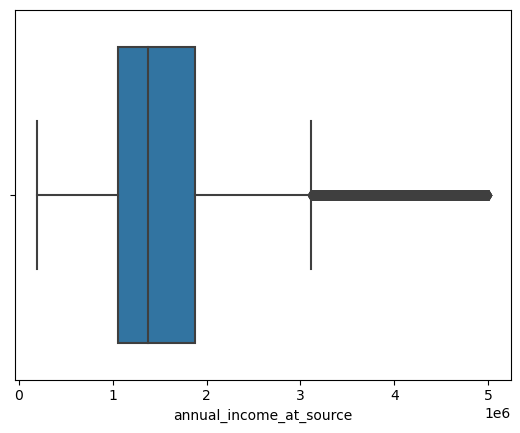

In [456]:
sns.boxplot(data = df, x = 'annual_income_at_source')

In [457]:
Q1,Q3=np.percentile(df['annual_income_at_source'],[25,75])
IQR=Q3-Q1
ur= Q3+(1.5 * IQR)

In [458]:
df['annual_income_at_source_ot'] = np.where(df['annual_income_at_source']>ur,ur,df['annual_income_at_source'])
df['annual_income_at_source_ot'].describe()

count    8.448000e+03
mean     1.555182e+06
std      7.880649e+05
min      2.000950e+05
25%      1.061104e+06
50%      1.372134e+06
75%      1.881734e+06
max      3.112680e+06
Name: annual_income_at_source_ot, dtype: float64

<AxesSubplot:xlabel='annual_income_at_source_ot'>

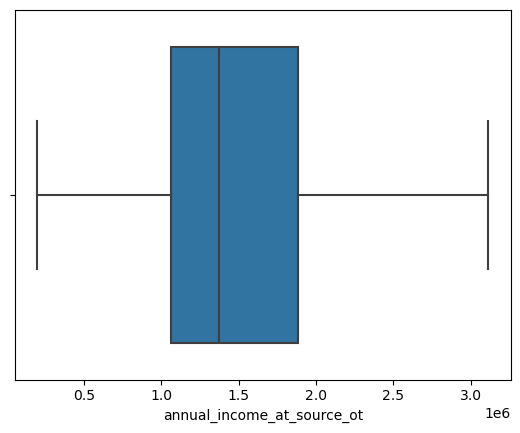

In [459]:
sns.boxplot(data = df, x = 'annual_income_at_source_ot')

<AxesSubplot:xlabel='bank_vintage'>

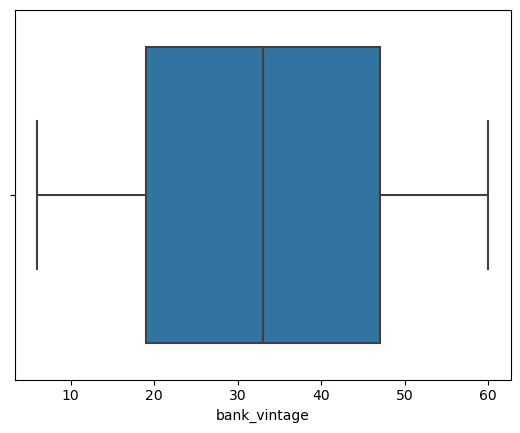

In [460]:
sns.boxplot(data = df, x = 'bank_vintage')

<AxesSubplot:xlabel='avg_spends_l3m'>

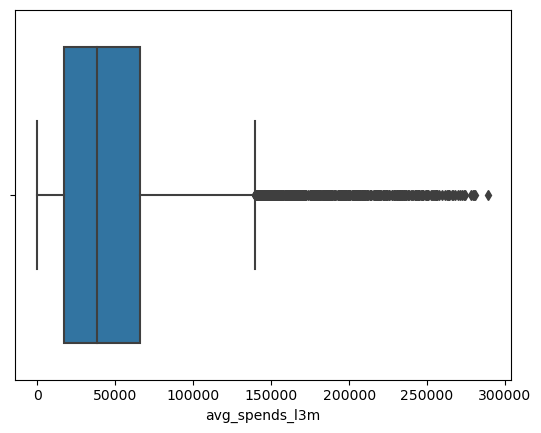

In [461]:
sns.boxplot(data = df, x = 'avg_spends_l3m')

<AxesSubplot:xlabel='cc_limit'>

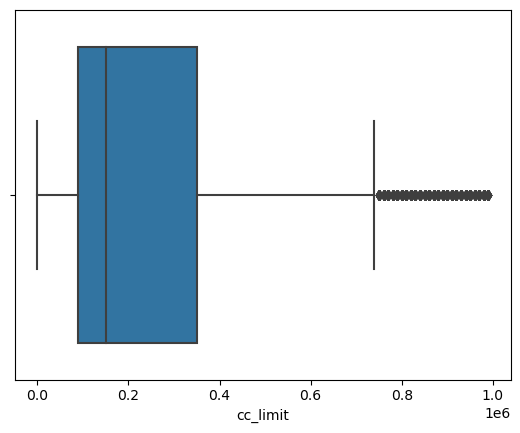

In [462]:
sns.boxplot(data = df, x = 'cc_limit')

In [463]:
Q1,Q3=np.percentile(df['cc_limit'],[25,75])
IQR=Q3-Q1
ur= Q3+(1.5 * IQR)

In [464]:
df['cc_limit_ot'] = np.where(df['cc_limit']>ur,ur,df['cc_limit'])
df['cc_limit_ot'].describe()

count      8448.000000
mean     243127.367424
std      206403.402926
min           0.000000
25%       90000.000000
50%      150000.000000
75%      350000.000000
max      740000.000000
Name: cc_limit_ot, dtype: float64

<AxesSubplot:xlabel='cc_limit_ot'>

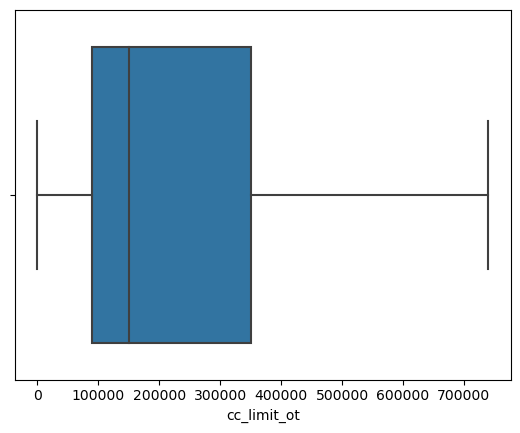

In [465]:
sns.boxplot(data = df, x = 'cc_limit_ot')

In [467]:
df.describe().T

count          mean           std       min  \
userid                      8448.0  4.224500e+03  2.438872e+03       1.0   
card_bin_no                 8448.0  4.367470e+05  3.048975e+04  376916.0   
active_30                   8448.0  2.923769e-01  4.548815e-01       0.0   
active_60                   8448.0  4.947917e-01  5.000025e-01       0.0   
active_90                   8448.0  6.420455e-01  4.794271e-01       0.0   
cc_active30                 8448.0  2.840909e-01  4.510070e-01       0.0   
cc_active60                 8448.0  4.844934e-01  4.997891e-01       0.0   
cc_active90                 8448.0  6.323390e-01  4.821970e-01       0.0   
widget_products             8448.0  3.614583e+00  2.273193e+00       0.0   
engagement_products         8448.0  3.991122e+00  2.572135e+00       0.0   
annual_income_at_source     8448.0  1.674595e+06  1.064307e+06  200095.0   
bank_vintage                8448.0  3.316418e+01  1.586834e+01       6.0   
T+1_month_activity          8448.0  1.112689e-01  3.144835e-01       0.0   
T+2_month_activity          8448.0  4.794034e-02  2.136527e-01       0.0   
T+3_month_activity          8448.0  8.037405e-02  2.718875e-01       0.0   
T+6_month_activity          8448.0  8.877841e-03  9.380867e-02       0.0   
T+12_month_activity         8448.0  9.469697e-03  9.685625e-02       0.0   
avg_spends_l3m              8448.0  4.952737e+04  4.624495e+04       0.0   
cc_limit                    8448.0  2.517069e+05  2.291149e+05       0.0   
annual_income_at_source_ot  8448.0  1.555182e+06  7.880649e+05  200095.0   
cc_limit_ot                 8448.0  2.431274e+05  2.064034e+05       0.0   

                                   25%        50%         75%          max  
userid                         2112.75     4224.5     6336.25     8448.000  
card_bin_no                  426241.00   437551.0   438439.00   524178.000  
active_30                         0.00        0.0        1.00        1.000  
active_60                         0.00        0.0        1.00        1.000  
active_90                         0.00        1.0        1.00        1.000  
cc_active30                       0.00        0.0        1.00        1.000  
cc_active60                       0.00        0.0        1.00        1.000  
cc_active90                       0.00        1.0        1.00        1.000  
widget_products                   2.00        4.0        6.00        7.000  
engagement_products               2.00        4.0        6.00        8.000  
annual_income_at_source     1061104.00  1372133.5  1881734.25  4999508.000  
bank_vintage                     19.00       33.0       47.00       60.000  
T+1_month_activity                0.00        0.0        0.00        1.000  
T+2_month_activity                0.00        0.0        0.00        1.000  
T+3_month_activity                0.00        0.0        0.00        1.000  
T+6_month_activity                0.00        0.0        0.00        1.000  
T+12_month_activity               0.00        0.0        0.00        1.000  
avg_spends_l3m                17110.00    37943.0    66095.75   289292.000  
cc_limit                      90000.00   150000.0   350000.00   990000.000  
annual_income_at_source_ot  1061104.00  1372133.5  1881734.25  3112679.625  
cc_limit_ot                   90000.00   150000.0   350000.00   740000.000

In [468]:
df["Issuer"].value_counts()

Visa          7279
Mastercard     728
Amex           441
Name: Issuer, dtype: int64

In [469]:
df["card_type"].value_counts()

rewards       1502
prosperity    1007
edge           980
chartered      923
smartearn      765
shoprite       688
indianoil      680
cashback       676
aura           652
gold           145
prime          112
pulse          101
elite           96
centurion       62
platinum        59
Name: card_type, dtype: int64

In [470]:
df["high_networth"].value_counts()

A    1740
D    1696
E    1693
B    1660
C    1659
Name: high_networth, dtype: int64

In [471]:
df['active_30'].value_counts()

0    5978
1    2470
Name: active_30, dtype: int64

In [472]:
df['active_60'].value_counts()

0    4268
1    4180
Name: active_60, dtype: int64

In [473]:
df['active_90'].value_counts()

1    5424
0    3024
Name: active_90, dtype: int64

In [474]:
df['cc_active30'].value_counts()

0    6048
1    2400
Name: cc_active30, dtype: int64

In [475]:
df['cc_active60'].value_counts()

0    4355
1    4093
Name: cc_active60, dtype: int64

In [476]:
df['cc_active90'].value_counts()

1    5342
0    3106
Name: cc_active90, dtype: int64

In [477]:
df['hotlist_flag'].value_counts()

N    8410
Y      38
Name: hotlist_flag, dtype: int64

In [478]:
df['other_bank_cc_holding'].value_counts()

Y    4728
N    3720
Name: other_bank_cc_holding, dtype: int64

In [479]:
df['T+1_month_activity'].value_counts()

0    7508
1     940
Name: T+1_month_activity, dtype: int64

In [480]:
df['T+2_month_activity'].value_counts()

0    8043
1     405
Name: T+2_month_activity, dtype: int64

In [481]:
df['T+3_month_activity'].value_counts()

0    7769
1     679
Name: T+3_month_activity, dtype: int64

In [482]:
df['T+6_month_activity'].value_counts()

0    8373
1      75
Name: T+6_month_activity, dtype: int64

In [483]:
df['T+12_month_activity'].value_counts()

0    8368
1      80
Name: T+12_month_activity, dtype: int64

In [484]:
df['Transactor_revolver'].value_counts()

T          7115
R          1295
Unknown      38
Name: Transactor_revolver, dtype: int64

In [485]:
df['Occupation_at_source'].value_counts()

Salaried         3918
Self Employed    2175
Retired          1089
Student           621
Housewife         384
Unknown           261
Name: Occupation_at_source, dtype: int64

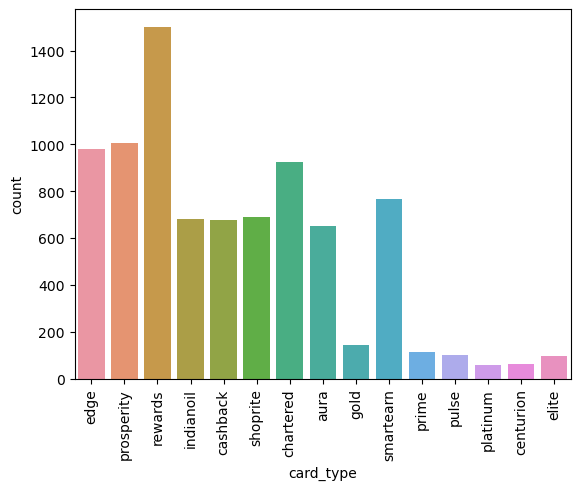

In [486]:
#Which card_type is seeing highest average_l3m_spend? 
#highest card_type holders
plt.xticks(rotation = 90)
sns.countplot(data = df, x = 'card_type');

Top 5 card types owned by holders
#
rewards       1502
#
prosperity    1007
#
edge           980
#
chartered      923
#
smartearn      765

More than half of credit card holders posses first 5 category types.

In [371]:
df["card_type"].value_counts(normalize = True)

rewards       0.177794
prosperity    0.119200
edge          0.116004
chartered     0.109257
smartearn     0.090554
shoprite      0.081439
indianoil     0.080492
cashback      0.080019
aura          0.077178
gold          0.017164
prime         0.013258
pulse         0.011955
elite         0.011364
centurion     0.007339
platinum      0.006984
Name: card_type, dtype: float64

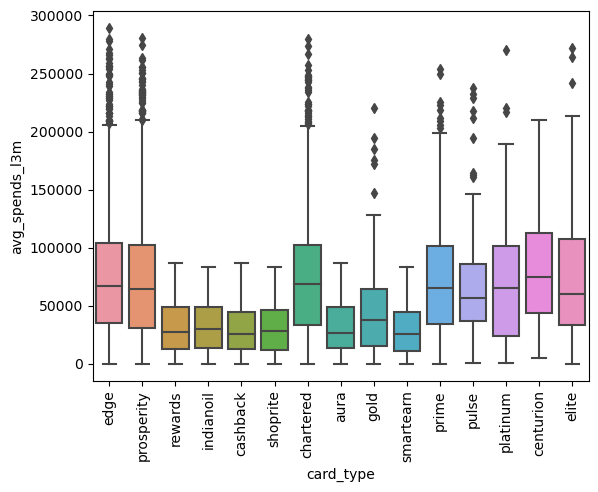

In [363]:
#card_type vs avg_spends_l3m 
plt.xticks(rotation = 90)
sns.boxplot(data=df, x = 'card_type', y = 'avg_spends_l3m');

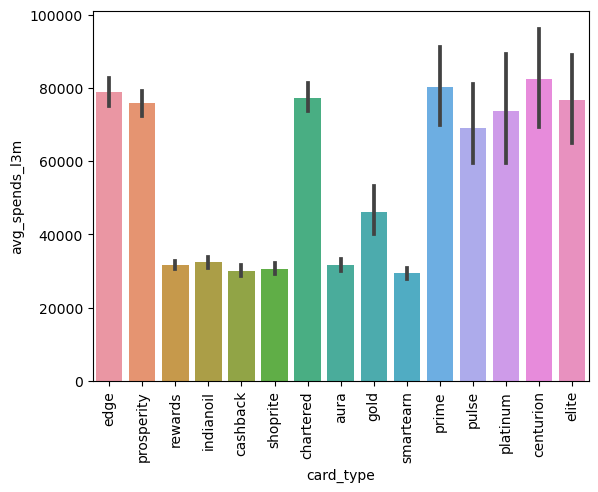

In [366]:
plt.xticks(rotation = 90)
sns.barplot(data = df, x = 'card_type', y = 'avg_spends_l3m');

In [370]:
df.groupby('card_type')['avg_spends_l3m'].mean().sort_values(ascending = False)

card_type
centurion     82440.564516
prime         80403.357143
edge          78981.873469
chartered     77330.923077
elite         76668.229167
prosperity    75789.428004
platinum      73599.711864
pulse         69031.188119
gold          46164.641379
indianoil     32356.322059
aura          31580.196319
rewards       31516.928096
shoprite      30667.816860
cashback      30049.690828
smartearn     29384.892810
Name: avg_spends_l3m, dtype: float64

In [ ]:
#avg spend of centurion and prime card types are higher but the count of people possessing those card types is very low. 
#avg spending of rewards category is low but highest number of customers are possessing this card type.


<AxesSubplot:xlabel='widget_products', ylabel='avg_spends_l3m'>

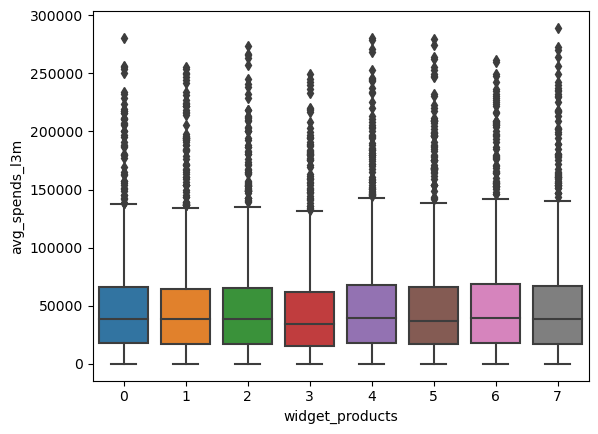

In [487]:
sns.boxplot(data = df, x = 'widget_products', y = 'avg_spends_l3m')

<AxesSubplot:xlabel='engagement_products', ylabel='avg_spends_l3m'>

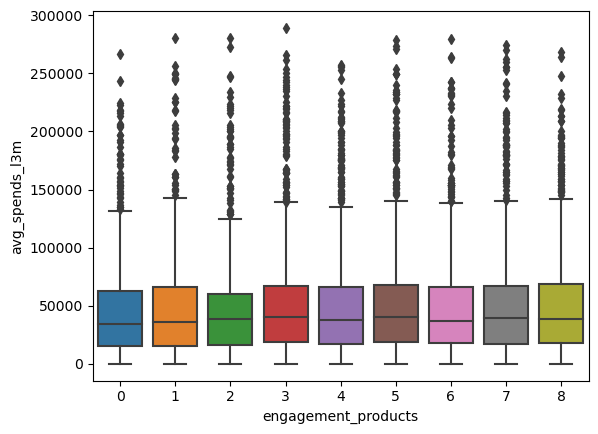

In [489]:
sns.boxplot(data = df, x = 'engagement_products', y = 'avg_spends_l3m')

<AxesSubplot:xlabel='Occupation_at_source', ylabel='avg_spends_l3m'>

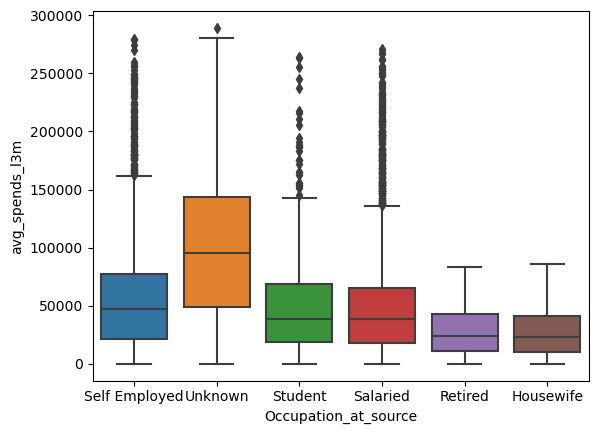

In [490]:
sns.boxplot(data = df, x = 'Occupation_at_source', y = 'avg_spends_l3m')

In [ ]:
#Which category of networth people use creditcards the most in last 30, 60, 90 months 

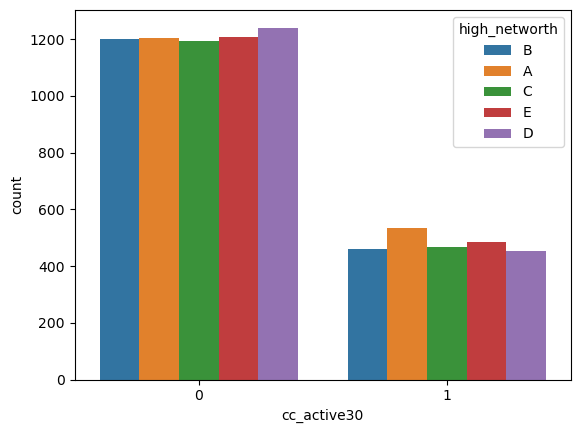

In [372]:
sns.countplot(data = df, x = 'cc_active30', hue = 'high_networth');

In [376]:
pd.crosstab(df['cc_active30'], df['high_networth'], margins=True, normalize = True)

high_networth         A         B         C         D         E       All
cc_active30                                                              
0              0.142637  0.142164  0.141217  0.146899  0.142992  0.715909
1              0.063329  0.054332  0.055161  0.053859  0.057410  0.284091
All            0.205966  0.196496  0.196378  0.200758  0.200402  1.000000

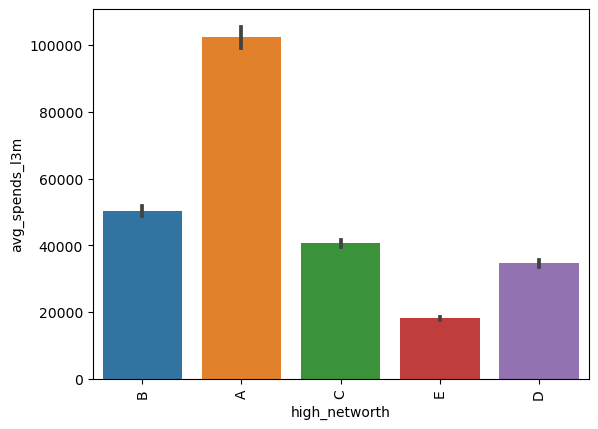

In [377]:
plt.xticks(rotation = 90)
sns.barplot(data = df, x = 'high_networth', y = 'avg_spends_l3m');
#high networth cat A has highest averge l3 month spends

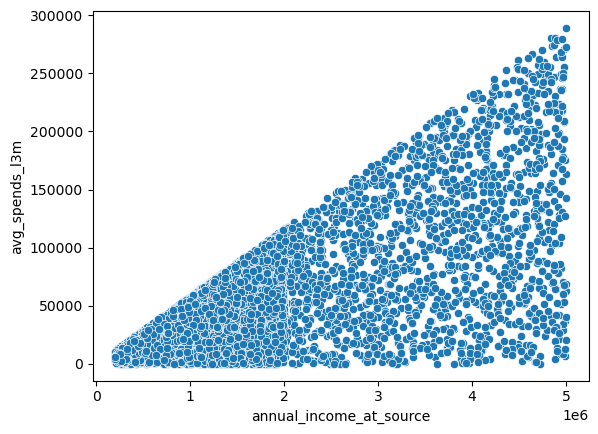

In [379]:
#Are low annual_income_at_source people attriding more? - avgspendl3m trends with annualincomeatsource
sns.scatterplot(data = df, x = 'annual_income_at_source', y = 'avg_spends_l3m');

In [386]:
df_low_annual_income_source = df[df['annual_income_at_source']<500000]

<AxesSubplot:xlabel='cc_active30', ylabel='count'>

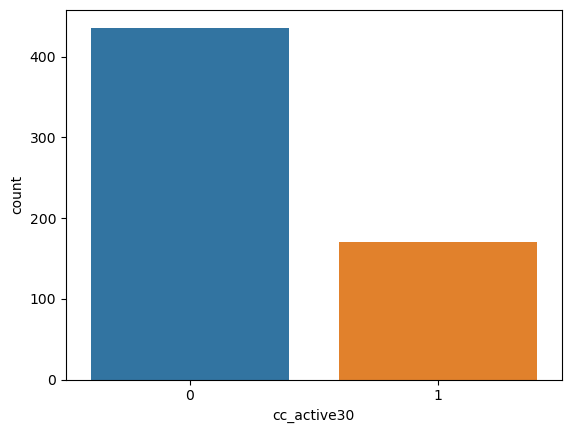

In [387]:
sns.countplot(data = df_low_annual_income_source, x = 'cc_active30')

In [388]:
df_low_annual_income_source['cc_active30'].value_counts(normalize = True)

0    0.719472
1    0.280528
Name: cc_active30, dtype: float64

In [ ]:
#Avg spend l3m trends of customers who hold other bank credit cards 

In [389]:
df['other_bank_cc_holding'].value_counts(normalize = True)

Y    0.559659
N    0.440341
Name: other_bank_cc_holding, dtype: float64

<AxesSubplot:xlabel='cc_active30', ylabel='avg_spends_l3m'>

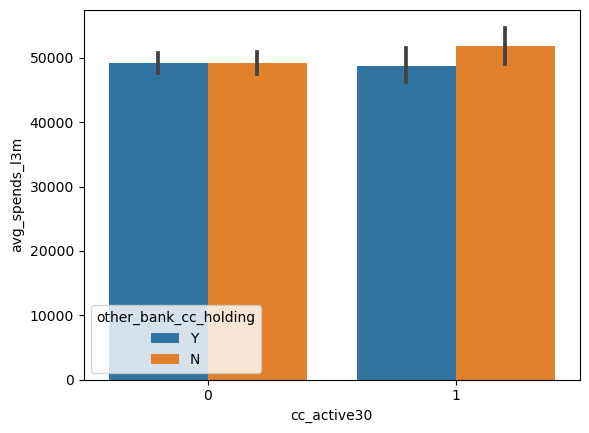

In [392]:
sns.barplot(data = df, x = 'cc_active30', y = 'avg_spends_l3m', hue = 'other_bank_cc_holding')

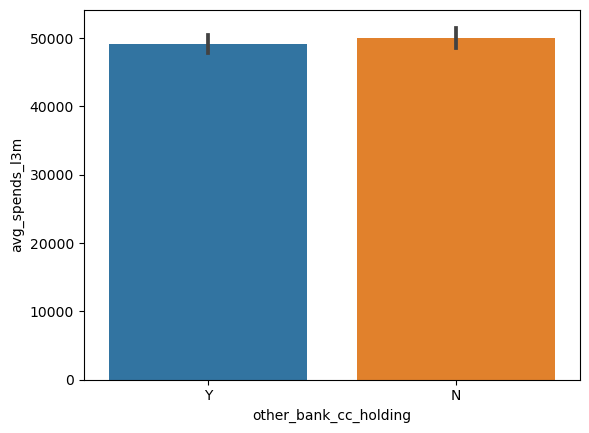

In [395]:
sns.barplot(data = df, x = 'other_bank_cc_holding', y = 'avg_spends_l3m');

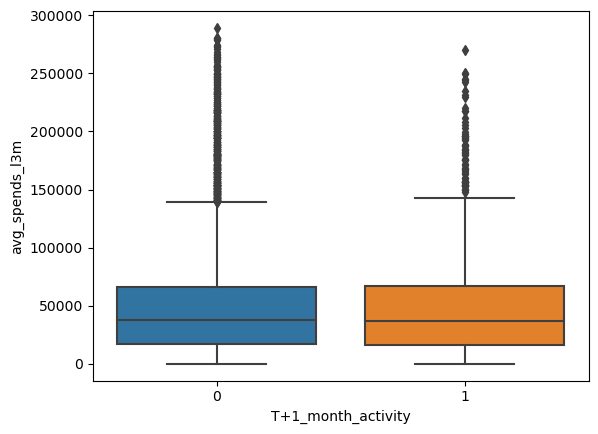

In [404]:
sns.boxplot(data = df, x = 'T+1_month_activity', y = 'avg_spends_l3m');

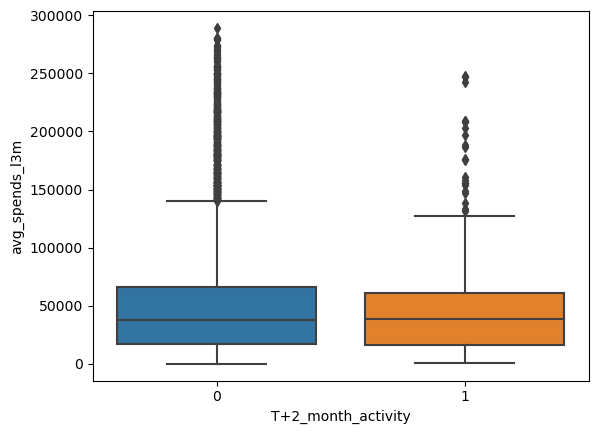

In [403]:
sns.boxplot(data = df, x = 'T+2_month_activity', y = 'avg_spends_l3m');

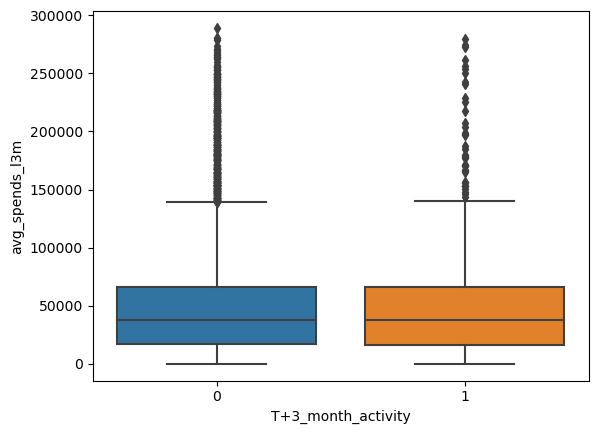

In [405]:
sns.boxplot(data = df, x = 'T+3_month_activity', y = 'avg_spends_l3m');

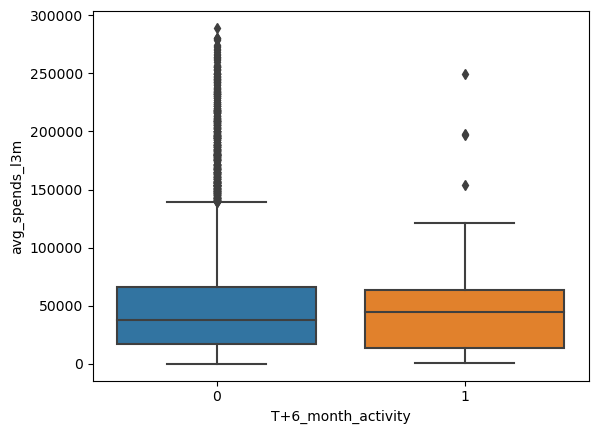

In [407]:
sns.boxplot(data = df, x = 'T+6_month_activity', y = 'avg_spends_l3m');

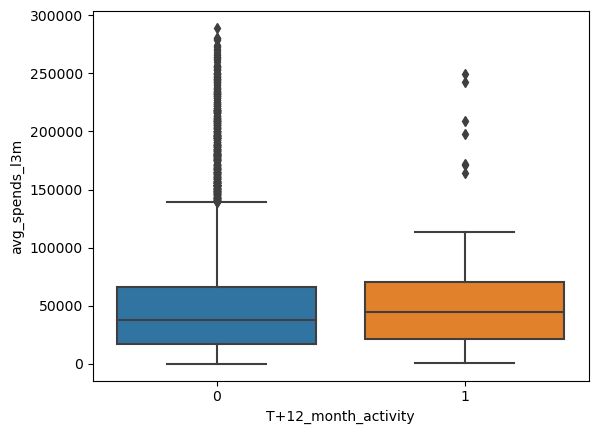

In [408]:
sns.boxplot(data = df, x = 'T+12_month_activity', y = 'avg_spends_l3m');

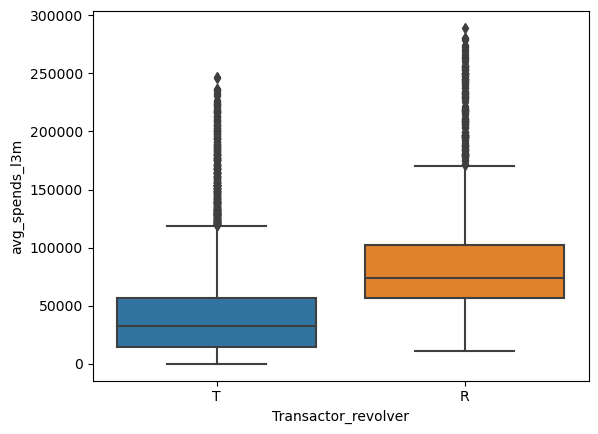

In [412]:
#Are the people who are having high/low avg_spend_l3m transactors or resolvers? 
sns.boxplot(data = df, x = 'Transactor_revolver', y = 'avg_spends_l3m');

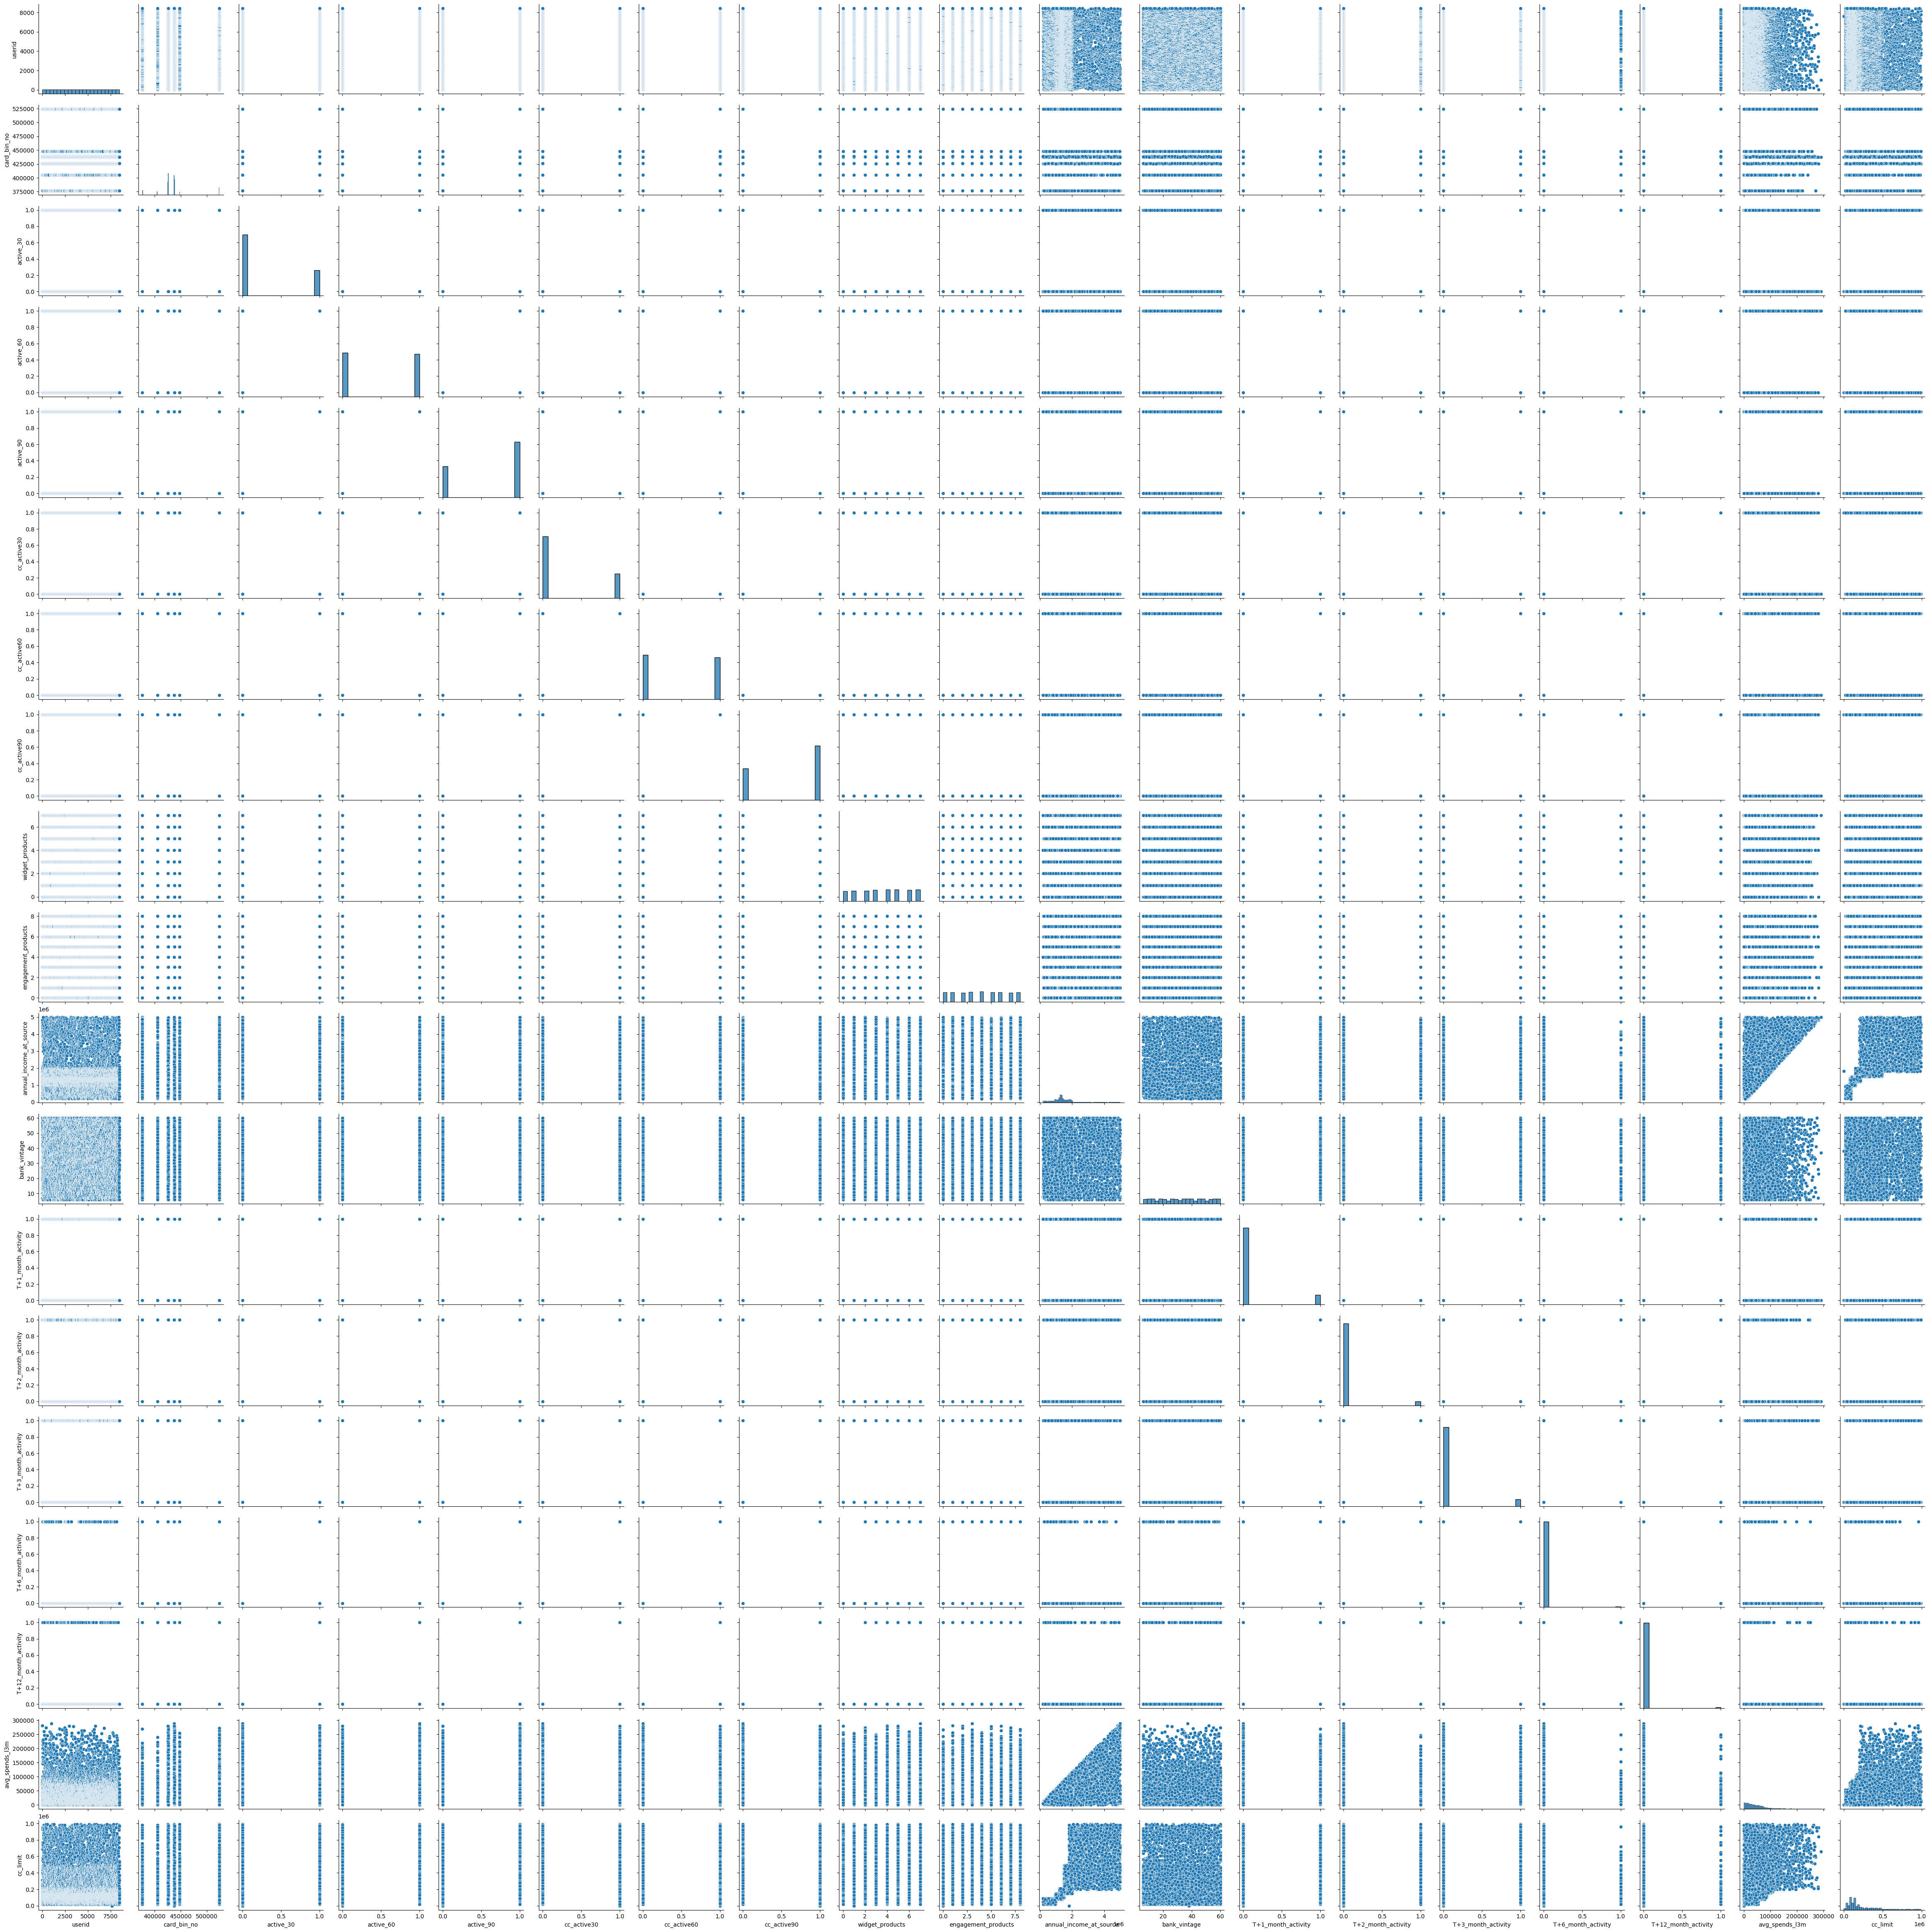

In [399]:
sns.pairplot(data = df);

<AxesSubplot:xlabel='cc_limit', ylabel='avg_spends_l3m'>

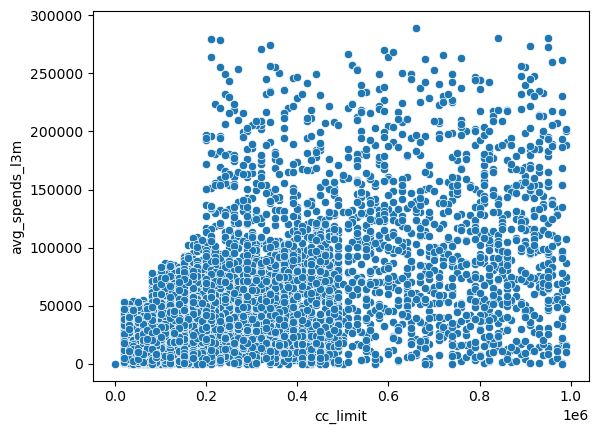

In [414]:
#cc limit vs avg spend months
sns.scatterplot(data = df, x = 'cc_limit', y = 'avg_spends_l3m')

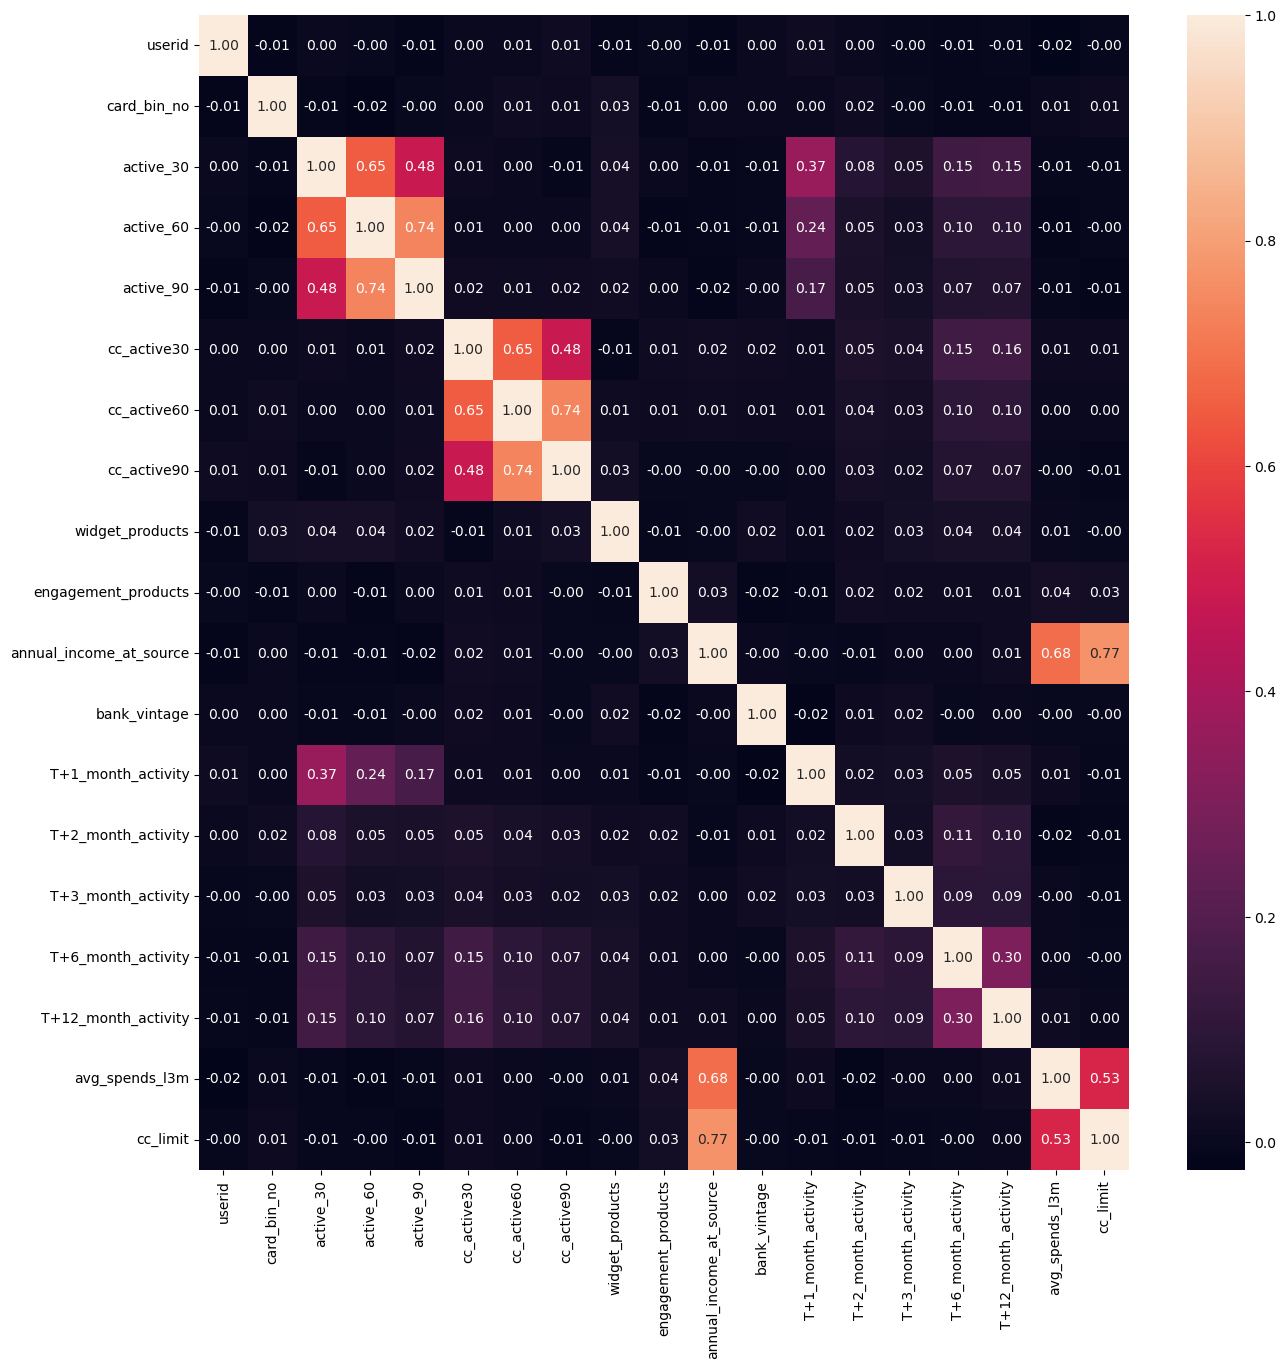

In [400]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

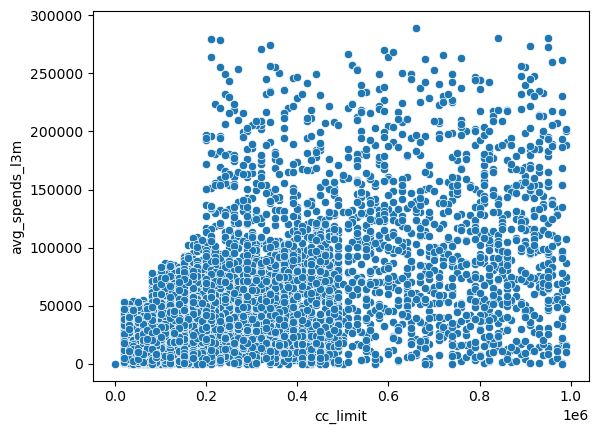

In [492]:
sns.scatterplot(data = df, x = 'cc_limit', y = 'avg_spends_l3m');

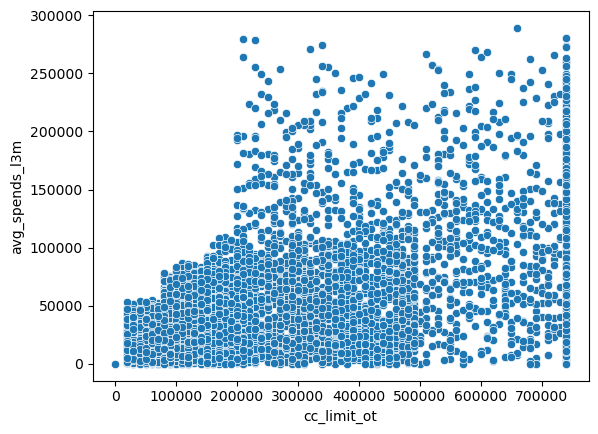

In [493]:
sns.scatterplot(data = df, x = 'cc_limit_ot', y = 'avg_spends_l3m');

<AxesSubplot:xlabel='hotlist_flag', ylabel='avg_spends_l3m'>

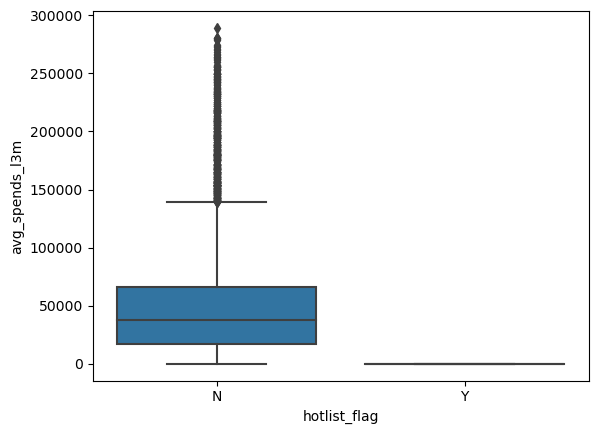

In [494]:
sns.boxplot(data = df, x = 'hotlist_flag', y = 'avg_spends_l3m')

In [415]:
df['high_spenders'] = df['cc_limit']-df['avg_spends_l3m']

0       262271
1       669146
2       139413
3        70844
4       181892
         ...  
8443    861287
8444    157631
8445     81541
8446    152900
8447     84756
Name: high_spenders, Length: 8448, dtype: int64

In [420]:
df[df['high_spenders'] < 0]

userid              card_no  card_bin_no Issuer  card_type  \
10        11  4262 41XX XXXX XXXX       426241   Visa   cashback   
29        30  4477 47XX XXXX XXXX       447747   Visa  smartearn   
37        38  4262 41XX XXXX XXXX       426241   Visa       aura   
74        75  4262 41XX XXXX XXXX       426241   Visa   shoprite   
125      126  4262 41XX XXXX XXXX       426241   Visa    rewards   
...      ...                  ...          ...    ...        ...   
8106    8107  4262 41XX XXXX XXXX       426241   Visa   cashback   
8224    8225  4377 48XX XXXX XXXX       437748   Visa  indianoil   
8242    8243  4386 28XX XXXX XXXX       438628   Visa  indianoil   
8299    8300  4262 41XX XXXX XXXX       426241   Visa  smartearn   
8440    8441  4384 39XX XXXX XXXX       438439   Visa  smartearn   

     card_source_date high_networth  active_30  active_60  active_90  \
10         1999-12-13             E          0          0          1   
29         2007-09-22             E          1          1          1   
37         2020-05-29             E          1          1          1   
74         2014-08-05             E          0          0          0   
125        2007-12-16             E          0          0          0   
...               ...           ...        ...        ...        ...   
8106       2009-07-08             E          0          1          1   
8224       2004-03-08             E          0          1          1   
8242       2016-12-22             E          1          1          1   
8299       2014-09-22             E          0          0          0   
8440       2017-08-06             E          0          0          0   

      cc_active30  cc_active60  cc_active90 hotlist_flag  widget_products  \
10              0            0            0            N                2   
29              0            0            0            N                1   
37              0            0            0            N                0   
74              0            0            1            N                2   
125             0            0            0            N                4   
...           ...          ...          ...          ...              ...   
8106            0            1            1            N                4   
8224            0            1            1            N                5   
8242            0            1            1            N                4   
8299            0            0            0            N                4   
8440            0            0            0            N                5   

      engagement_products  annual_income_at_source other_bank_cc_holding  \
10                      7                   969742                     N   
29                      8                   781278                     N   
37                      3                   588663                     N   
74                      2                   940936                     Y   
125                     6                   736659                     N   
...                   ...                      ...                   ...   
8106                    7                   902271                     N   
8224                    0                   506235                     N   
8242                    4                   867410                     N   
8299                    5                   885557                     N   
8440                    2                   818345                     N   

      bank_vintage  T+1_month_activity  T+2_month_activity  \
10              38                   0                   0   
29              16                   1                   0   
37              14                   0                   1   
74              35                   0                   0   
125             37                   0                   0   
...            ...                 ...                 ...   
8106            41                   0              

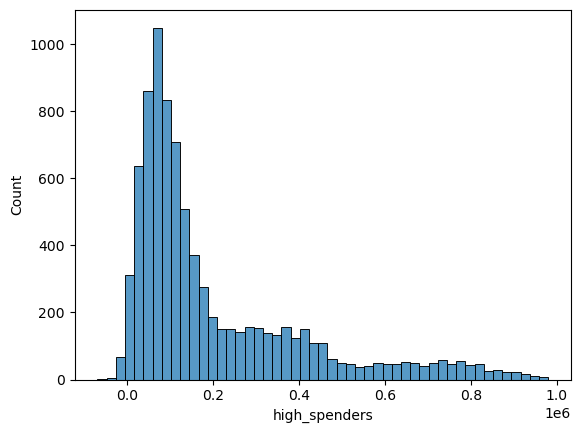

In [419]:
sns.histplot(data = df, x = 'high_spenders');

In [421]:
df['T+1_month_activity'].value_counts(normalize = True)

0    0.888731
1    0.111269
Name: T+1_month_activity, dtype: float64

In [422]:
df['T+2_month_activity'].value_counts(normalize = True)

0    0.95206
1    0.04794
Name: T+2_month_activity, dtype: float64

In [423]:
df['T+3_month_activity'].value_counts(normalize = True)

0    0.919626
1    0.080374
Name: T+3_month_activity, dtype: float64

In [424]:
df['T+6_month_activity'].value_counts(normalize = True)

0    0.991122
1    0.008878
Name: T+6_month_activity, dtype: float64

In [425]:
df['T+12_month_activity'].value_counts(normalize = True)

0    0.99053
1    0.00947
Name: T+12_month_activity, dtype: float64

#important variables ranking as I see
The term 'Vintage' refers to the month or quarter in which account was opened (loan was granted)
1. card type - moderate
2. high_networth - low to moderate
3. cc_active 30, 60, 90 - high to know how credit card was spent in last 30, 60, 90 days
4. T+ months activity - high
5. average_spends_l3m - equal as cc_active
6. cc_limit - moderate

In [ ]:
#other trials: